In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [5]:
#Se leen los datos. 
df_all = pd.read_csv('input/restaurants_dataset.csv')

# Convert 'Opening Day of Restaurant' to datetime
df_all['Opening Day of Restaurant'] = pd.to_datetime(df_all['Opening Day of Restaurant'], format='%d-%m-%Y', errors='coerce')

# Calculate the number of years from opening day to today
df_all['Years Since Opening'] = (pd.Timestamp.today() - df_all['Opening Day of Restaurant']).dt.days / 365.25

df_all.head()

Registration Number  Annual Turnover           Cuisine       City  \
0                60001         42000000      indian,irish  Bangalore   
1                60002         50000000      indian,irish     Indore   
2                60003         32500000   tibetan,italian    Chennai   
3                60004        110000000  turkish,nigerian    Gurgaon   
4                60005         20000000     irish,belgian    Manesar   

  Restaurant Location Opening Day of Restaurant  Facebook Popularity Quotient  \
0   Near Business Hub                2009-02-14                          84.3   
1      Near Party Hub                2008-09-29                          85.4   
2   Near Business Hub                2011-07-30                          85.0   
3      Near Party Hub                2008-11-30                          85.6   
4      Near Party Hub                2010-02-22                           NaN   

        Endorsed By  Instagram Popularity Quotient  Fire Audit  ...  \
0      Not Specific                           95.8           1  ...   
1  Tier A Celebrity                           85.0           1  ...   
2  Tier A Celebrity                           68.2           1  ...   
3  Tier A Celebrity                           83.6           0  ...   
4  Tier A Celebrity                           76.8           1  ...   

   Live Music Rating  Comedy Gigs Rating  Value Deals Rating  \
0                4.0                 NaN                 NaN   
1                NaN                 4.0                 NaN   
2                3.0                 NaN                 NaN   
3                6.0                 NaN                 NaN   
4                NaN                 2.0                 NaN   

   Live Sports Rating  Ambience Lively Service  Comfortablility  Privacy  \
0                 NaN       8.0      8       6                6        6   
1                 NaN       5.0      7       7                3        8   
2                 NaN       7.0     10       5                2        8   
3                 NaN       7.0      7       4                3        5   
4                 NaN       NaN      6       2                4        6   

   Years Since Opening  
0            16.465435  
1            16.843258  
2            14.012320  
3            16.673511  
4            15.444216  

[5 rows x 35 columns]

In [6]:
# Se explora las domenciones del dataset
print(f"Dataset shape: {df_all.shape}")

Dataset shape: (3493, 35)


In [7]:
#Algina información basica del dataset
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Registration Number            3493 non-null   int64         
 1   Annual Turnover                3493 non-null   int64         
 2   Cuisine                        3493 non-null   object        
 3   City                           3493 non-null   object        
 4   Restaurant Location            3493 non-null   object        
 5   Opening Day of Restaurant      3493 non-null   datetime64[ns]
 6   Facebook Popularity Quotient   3394 non-null   float64       
 7   Endorsed By                    3493 non-null   object        
 8   Instagram Popularity Quotient  3437 non-null   float64       
 9   Fire Audit                     3493 non-null   int64         
 10  Liquor License Obtained        3493 non-null   int64         
 11  Situated in a Mul

In [8]:
# Mostrar el porcentaje de datos faltantes por columna
missing_percent = df_all.isnull().mean() * 100
print("Porcentaje de datos faltantes por columna:")
print(missing_percent.sort_values(ascending=False))

Porcentaje de datos faltantes por columna:
Live Sports Rating               94.131119
Value Deals Rating               77.497853
Comedy Gigs Rating               71.085027
Live Music Rating                21.900945
Overall Restaurant Rating         6.069281
Facebook Popularity Quotient      2.834240
Instagram Popularity Quotient     1.603206
Resturant Tier                    1.402806
Ambience                          0.715717
Value for Money                   0.000000
Hygiene Rating                    0.000000
Food Rating                       0.000000
Registration Number               0.000000
Order Wait Time                   0.000000
Lively                            0.000000
Service                           0.000000
Comfortablility                   0.000000
Privacy                           0.000000
Staff Responsivness               0.000000
Restaurant Zomato Rating          0.000000
Restaurant City Tier              0.000000
Annual Turnover                   0.000000
Restaurant 

# limpieza de datos 

In [9]:
df = df_all.drop(['Live Sports Rating', 'Value Deals Rating', 'Comedy Gigs Rating','Registration Number'], axis=1)

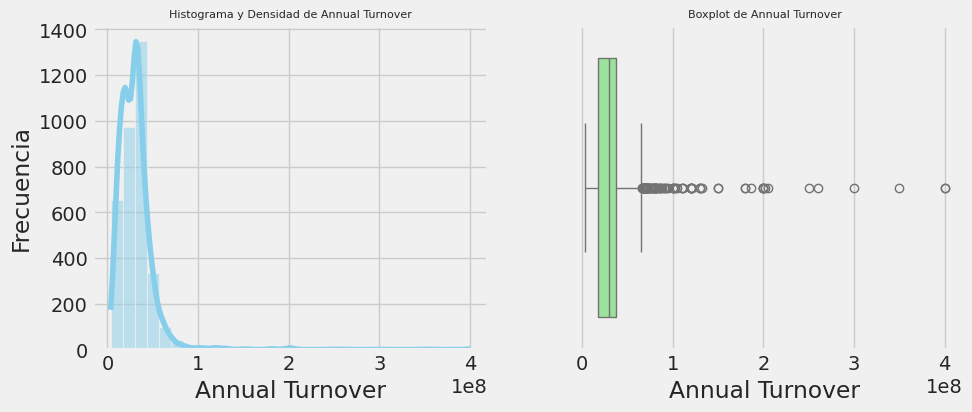

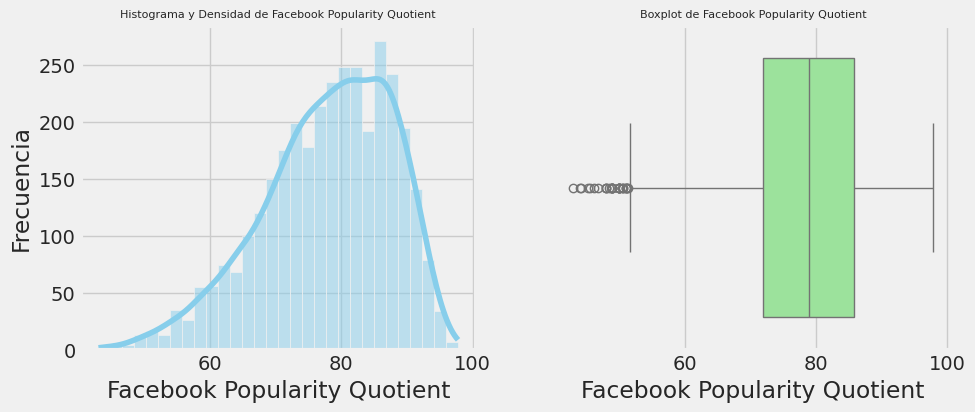

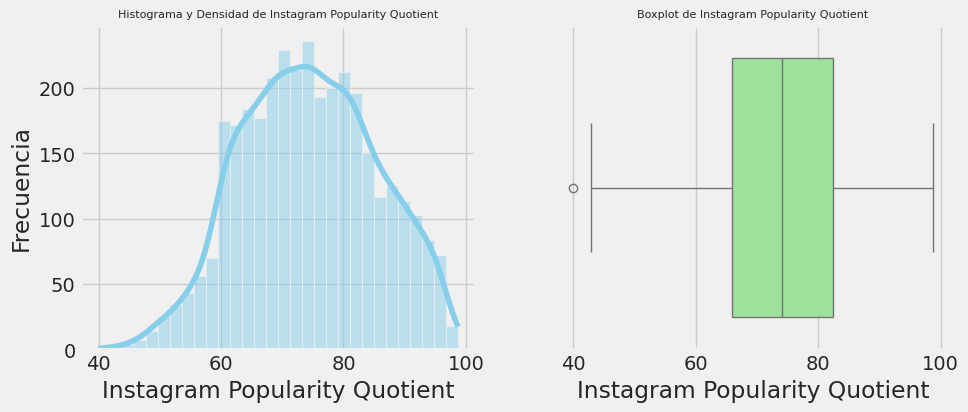

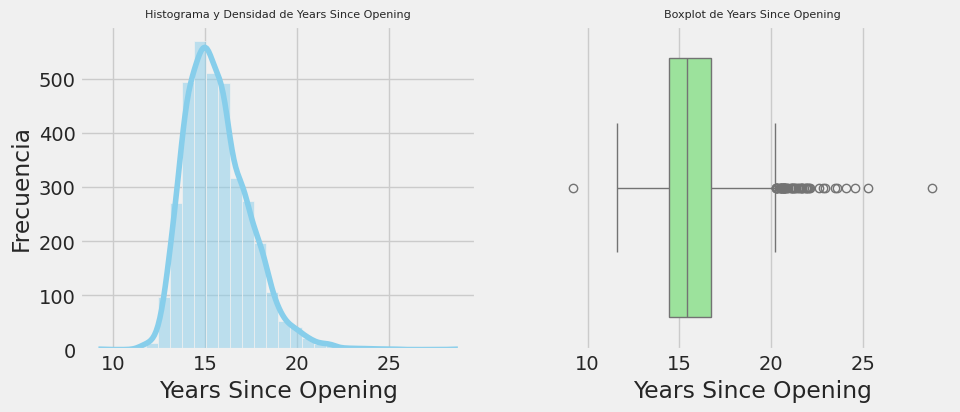

In [10]:
col_continue = ['Annual Turnover', 'Facebook Popularity Quotient', 'Instagram Popularity Quotient', 'Years Since Opening']
for col in col_continue:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Histograma y Densidad de {col}', fontsize=8)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col].dropna(), color='lightgreen')
    plt.title(f'Boxplot de {col}' , fontsize=8)
    plt.xlabel(col)

Percentil 99 de 'Annual Turnover': 65000000.0


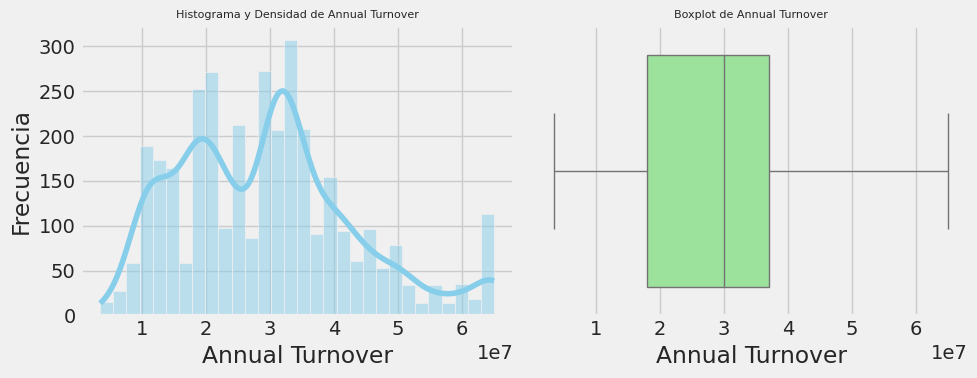

In [11]:
percentil_99 = df["Annual Turnover"].quantile(0.97)
print("Percentil 99 de 'Annual Turnover':", percentil_99)

df.loc[df["Annual Turnover"] > percentil_99, "Annual Turnover"] = percentil_99

col = "Annual Turnover"

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
plt.title(f'Histograma y Densidad de {col}', fontsize=8)
plt.xlabel(col)
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.boxplot(x=df[col].dropna(), color='lightgreen')
plt.title(f'Boxplot de {col}' , fontsize=8)
plt.xlabel(col)

plt.tight_layout()
plt.show()

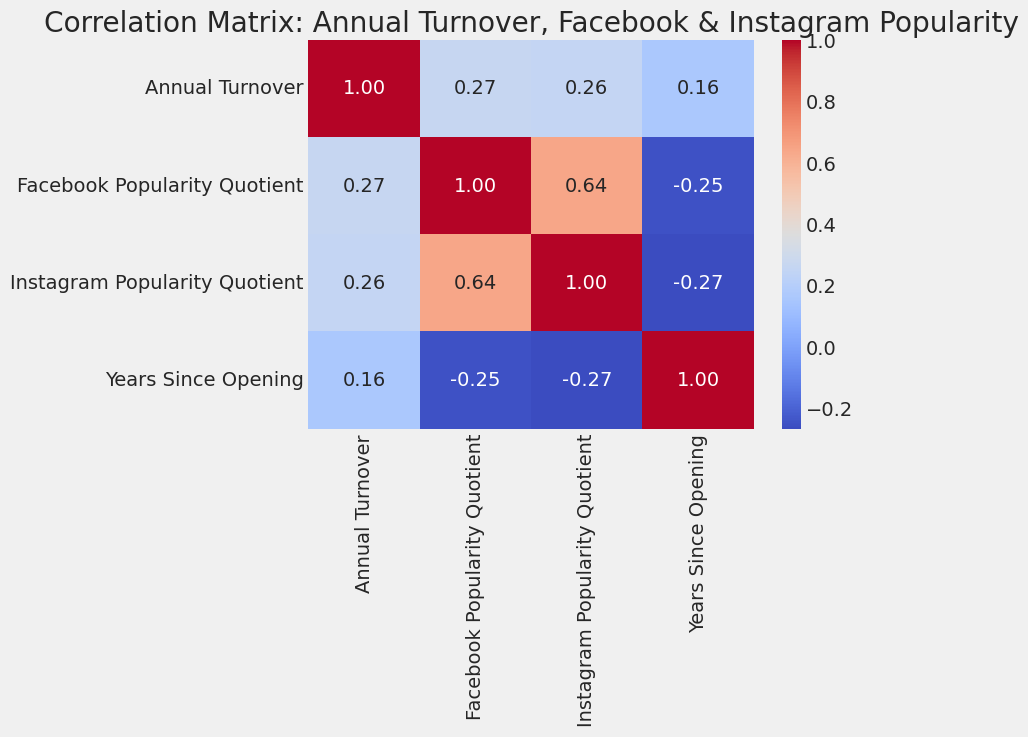

In [12]:
sns.heatmap(df[col_continue].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Annual Turnover, Facebook & Instagram Popularity')
plt.show()

Correlación de 'Annual Turnover' con las demás variables:
Hygiene Rating                   0.335047
Live Music Rating                0.266836
Facebook Popularity Quotient     0.266833
Instagram Popularity Quotient    0.255272
Value for Money                  0.235240
Staff Responsivness              0.227409
Restaurant Zomato Rating         0.197993
Overall Restaurant Rating        0.169734
Years Since Opening              0.162546
Lively                           0.065615
Fire Audit                       0.039205
Restaurant City Tier             0.032680
Dedicated Parking                0.031176
Liquor License Obtained          0.031056
Order Wait Time                  0.007768
Food Rating                     -0.006425
Open Sitting Available          -0.014492
Privacy                         -0.015677
Situated in a Multi Complex     -0.027331
Service                         -0.031523
Ambience                        -0.053982
Comfortablility                 -0.076373
Resturant Tier    

/tmp/ipykernel_25949/2109751023.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')


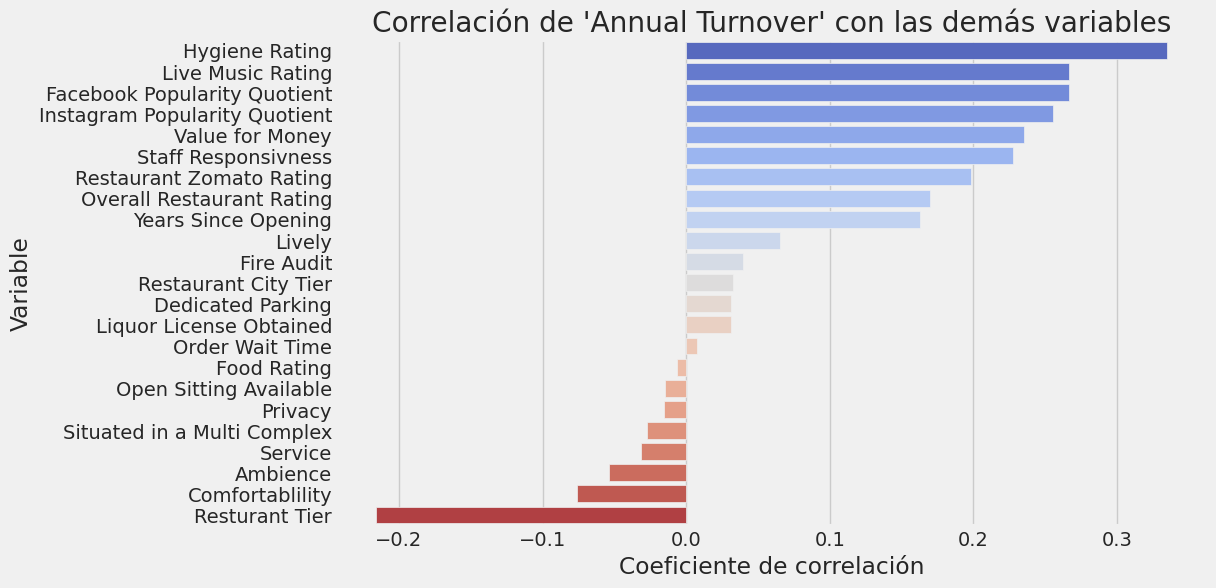

In [13]:
numerical_df = df.select_dtypes(include=np.number)
# Calcular la correlación de 'Annual Turnover' con las demás variables numéricas
correlations = numerical_df.corr()['Annual Turnover'].drop('Annual Turnover').sort_values(ascending=False)

# Mostrar la correlación ordenada
print("Correlación de 'Annual Turnover' con las demás variables:")
print(correlations)

# Graficar las correlaciones
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.title("Correlación de 'Annual Turnover' con las demás variables")
plt.xlabel("Coeficiente de correlación")
plt.ylabel("Variable")
plt.show()

In [14]:
int_columns = df.select_dtypes(include='int').columns
print("Integer columns:", int_columns.tolist())

Integer columns: ['Annual Turnover', 'Fire Audit', 'Liquor License Obtained', 'Situated in a Multi Complex', 'Dedicated Parking', 'Open Sitting Available', 'Restaurant Zomato Rating', 'Restaurant City Tier', 'Order Wait Time', 'Staff Responsivness', 'Value for Money', 'Hygiene Rating', 'Food Rating', 'Lively', 'Service', 'Comfortablility', 'Privacy']


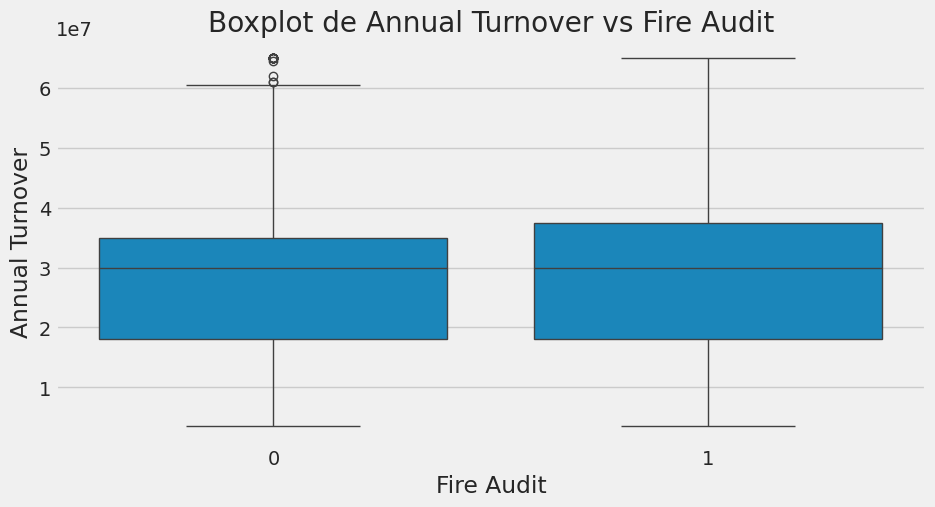

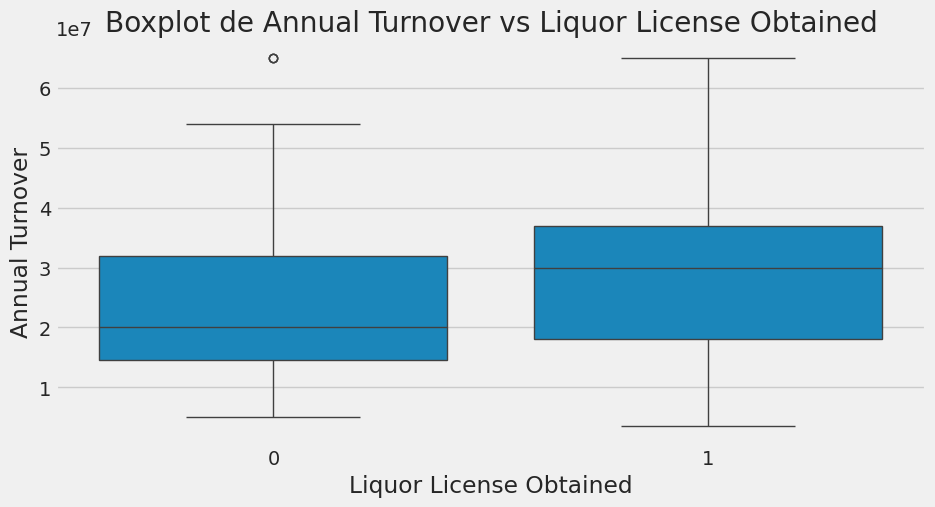

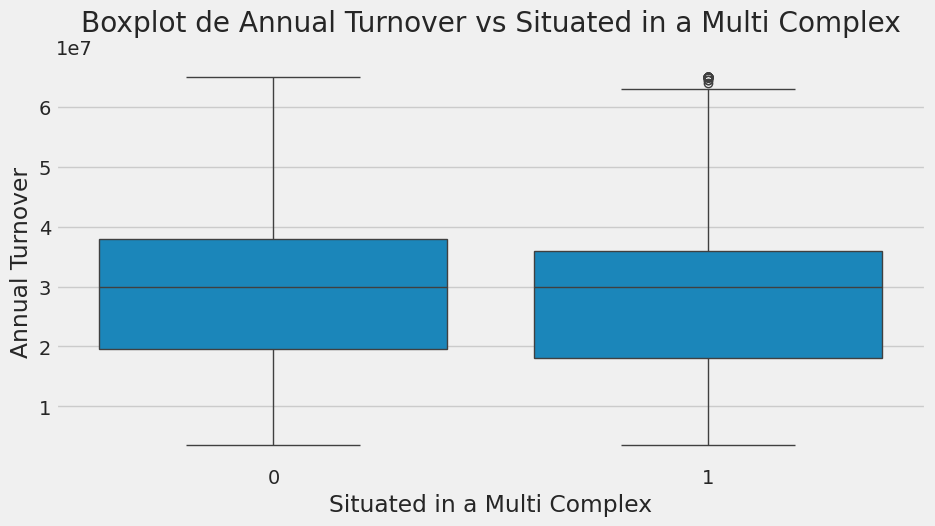

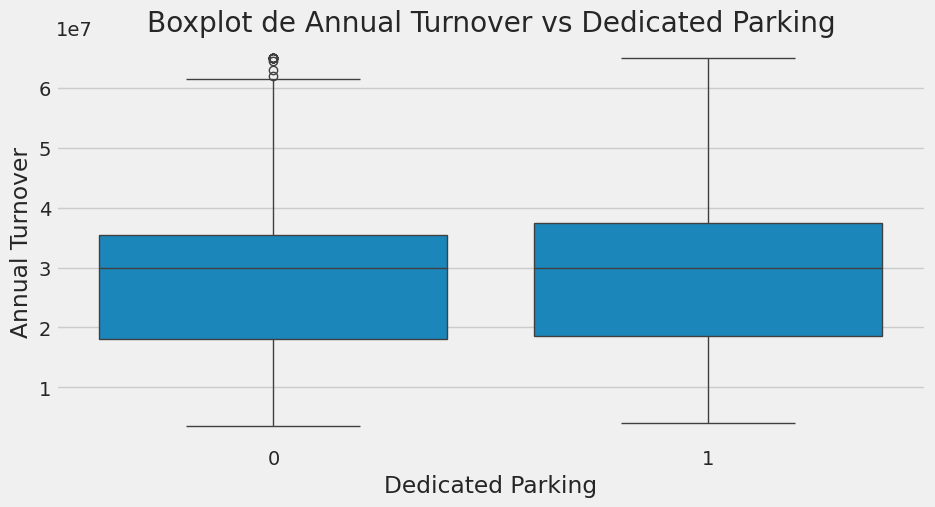

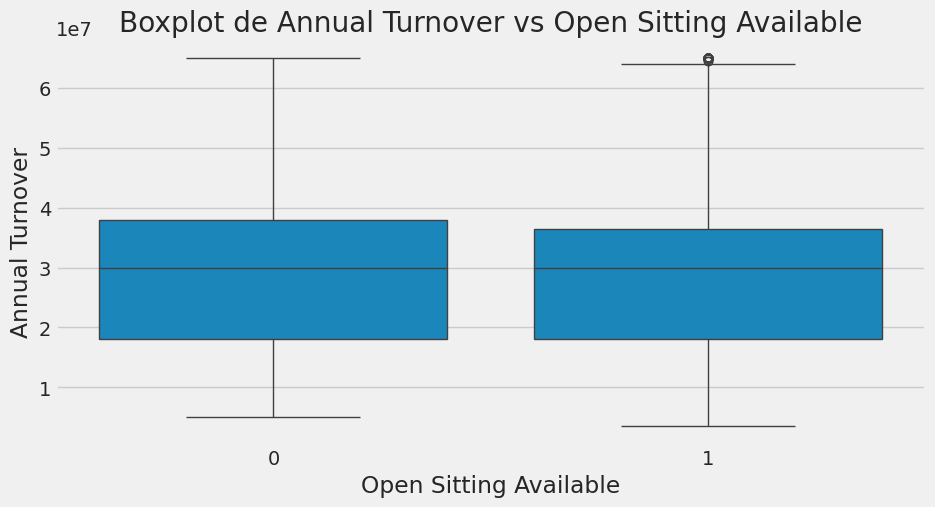

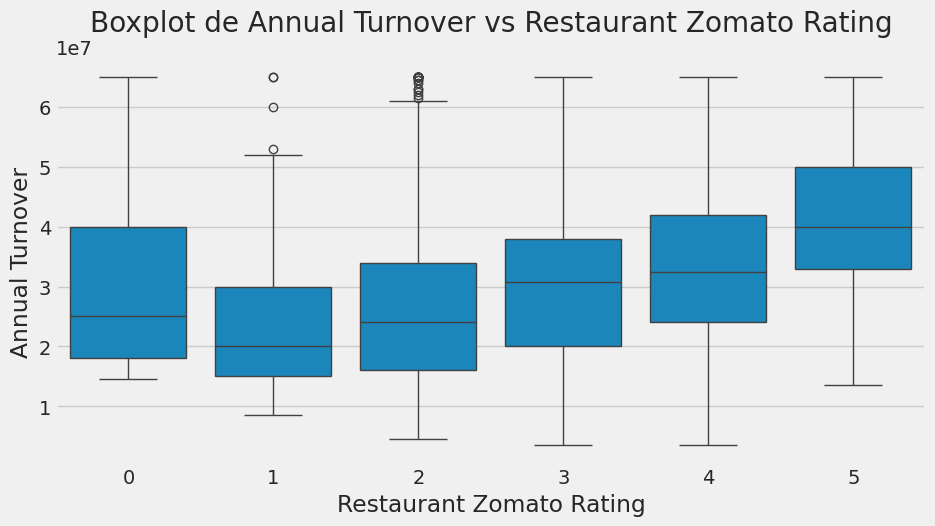

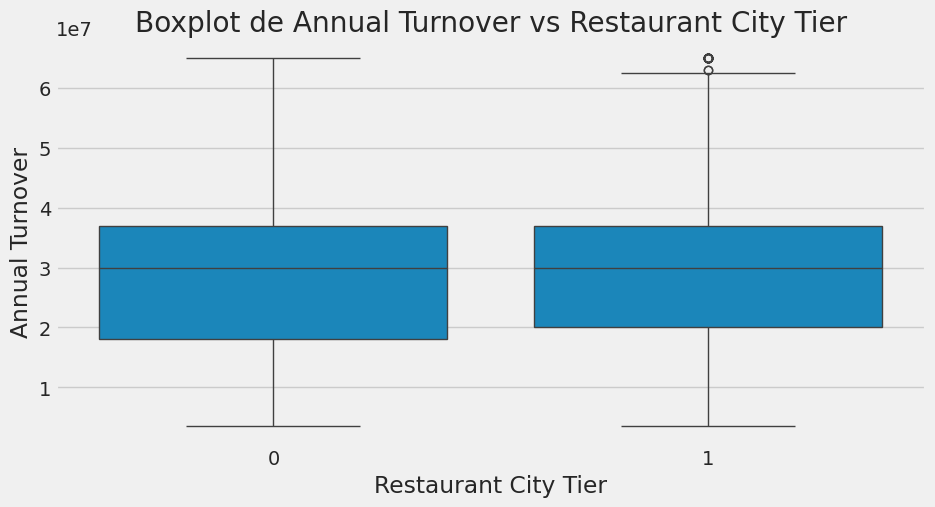

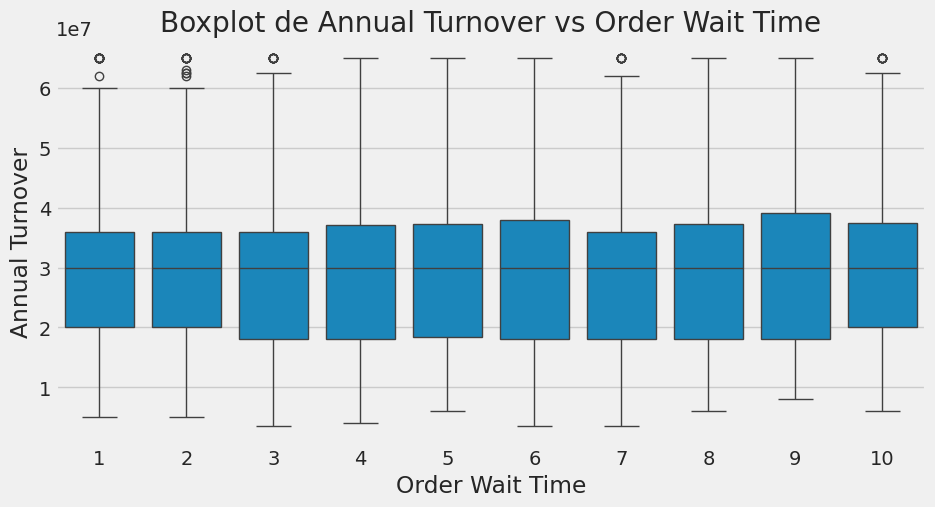

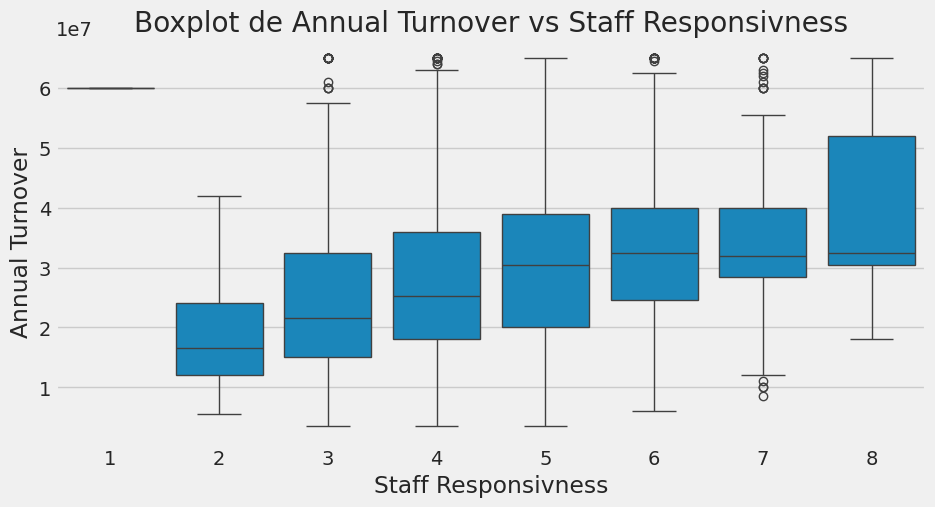

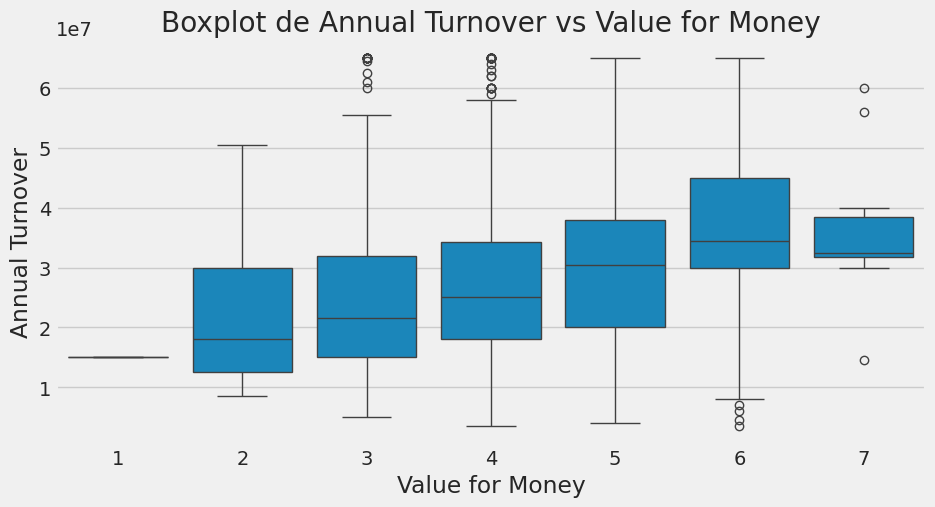

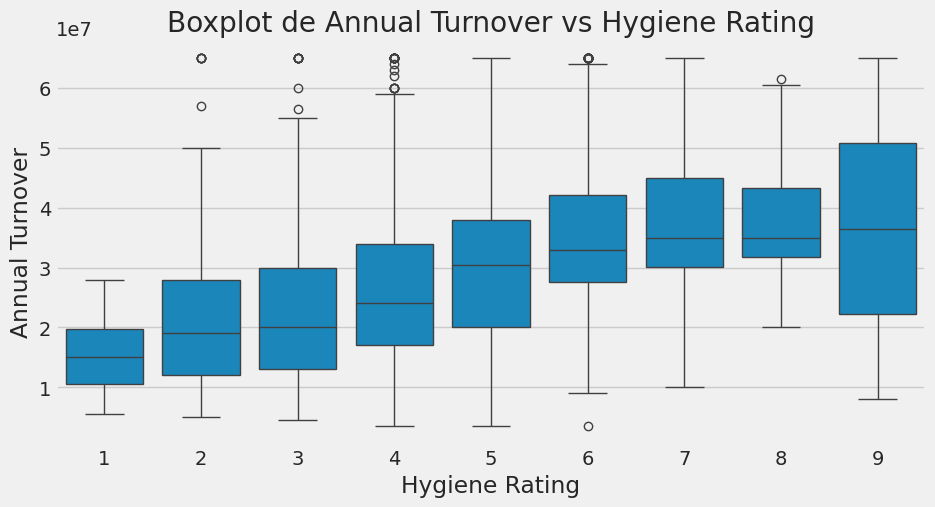

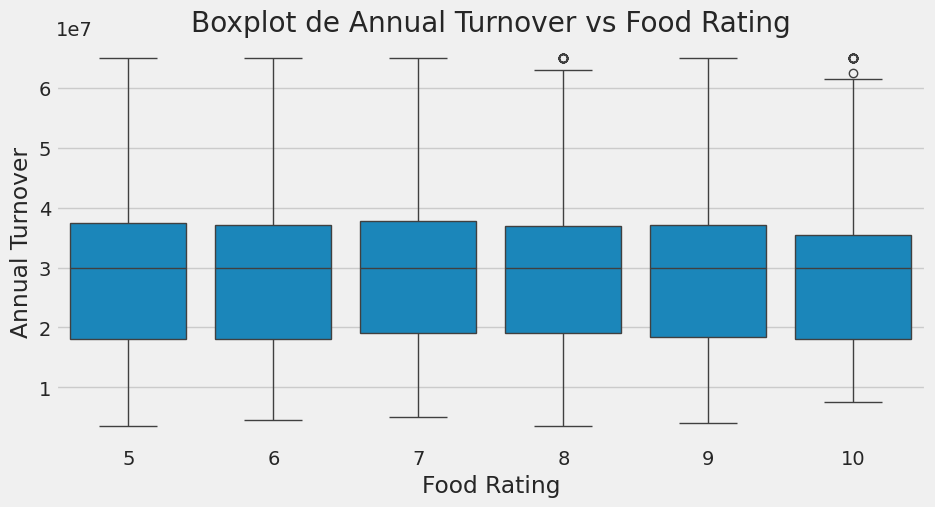

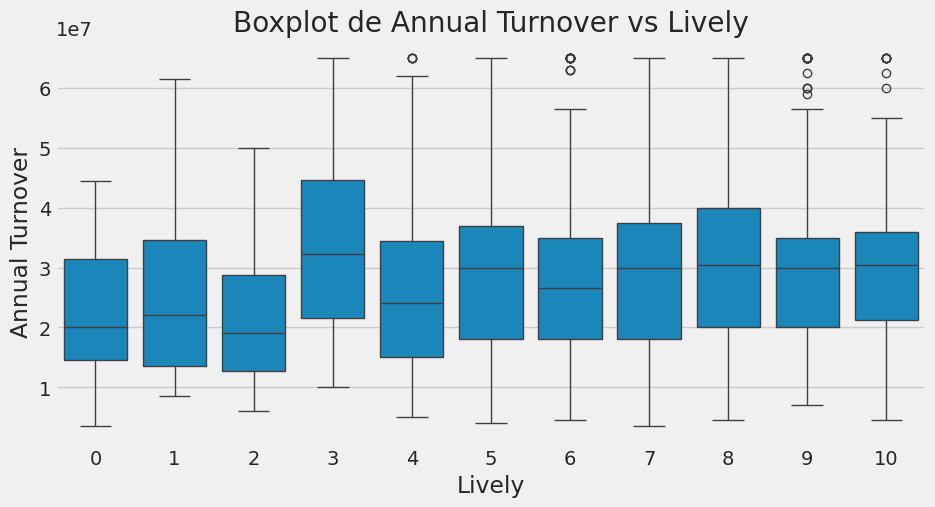

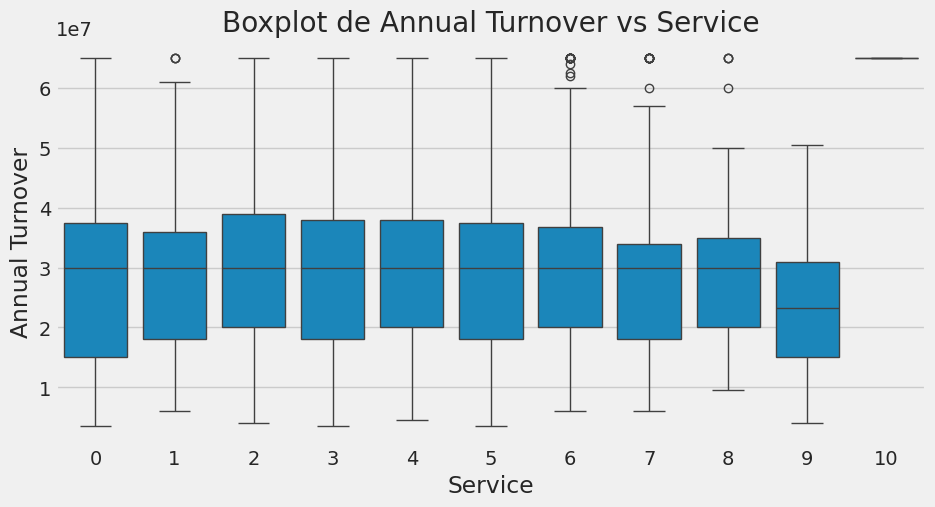

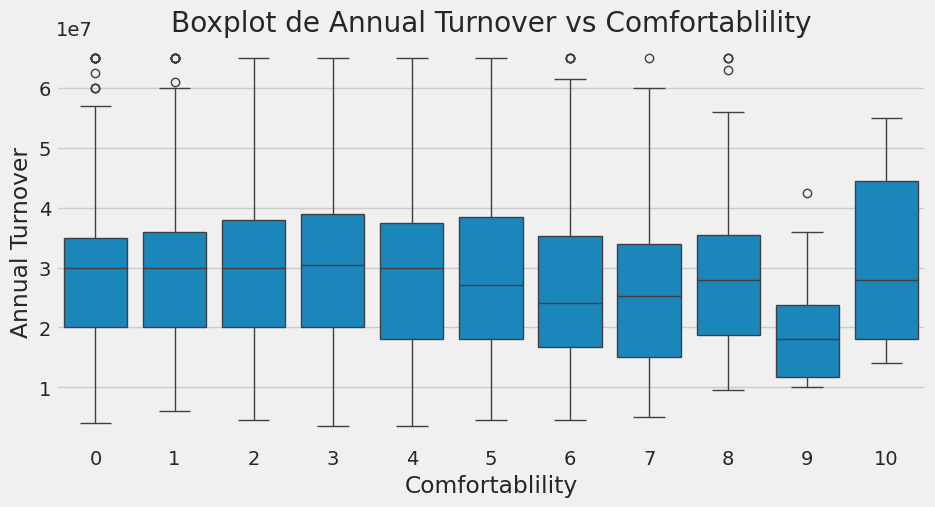

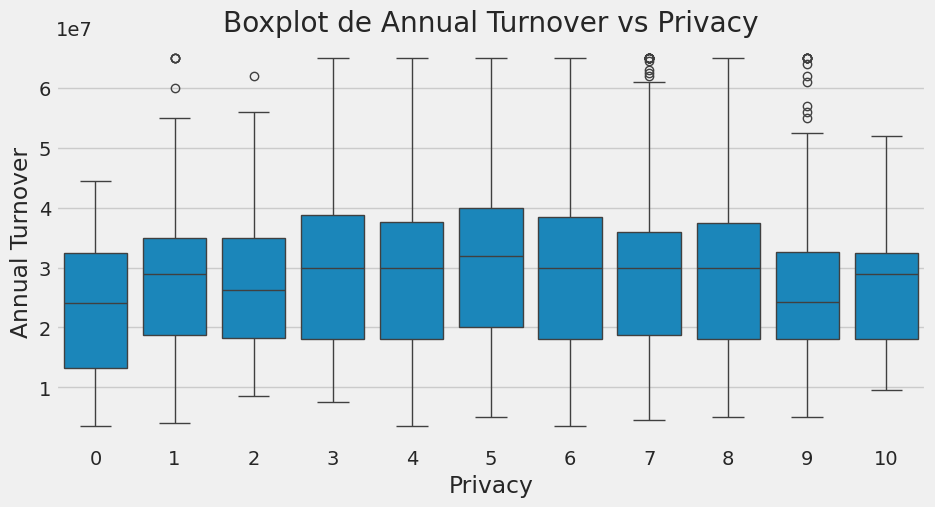

In [15]:
# Boxplot de 'Annual Turnover' frente a cada variable numérica entera (excepto 'Annual Turnover' mismo)
for col in int_columns:
    if col != 'Annual Turnover':
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[col], y=df['Annual Turnover'])
        plt.title(f"Boxplot de Annual Turnover vs {col}")
        plt.xlabel(col)
        plt.ylabel('Annual Turnover')
        plt.show()


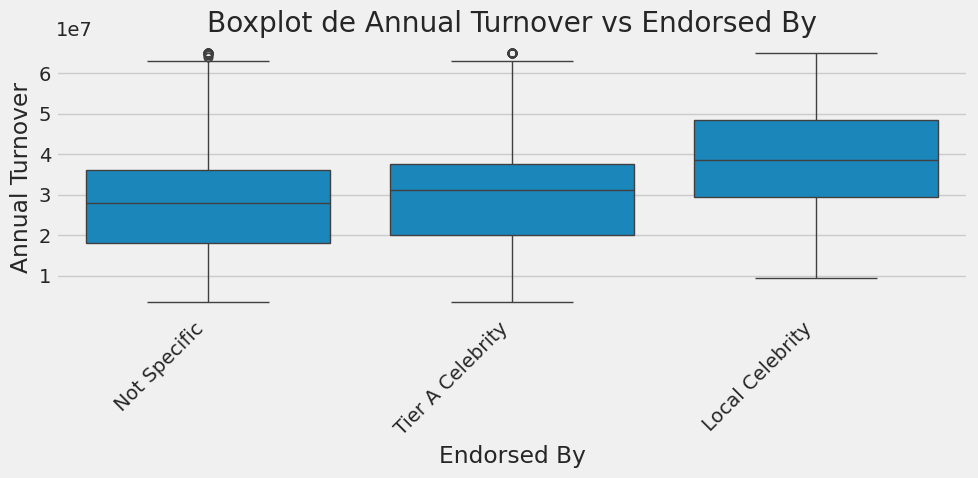

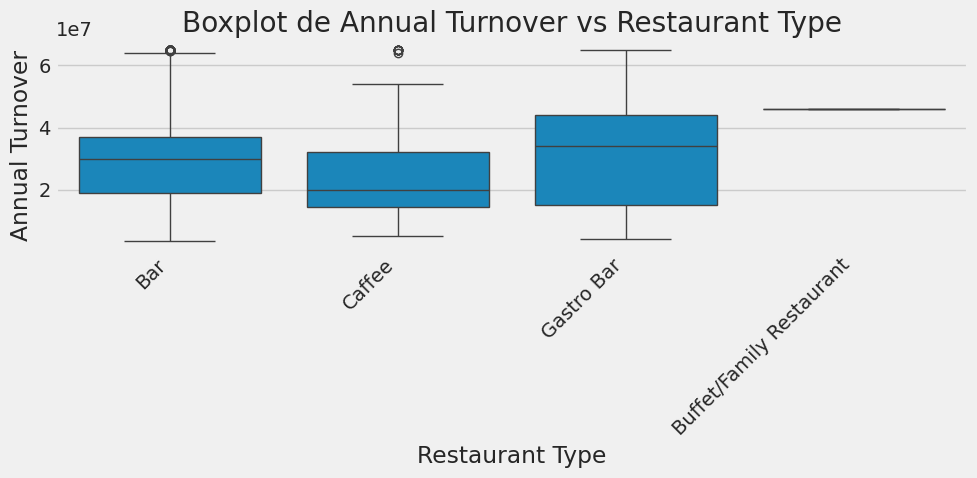

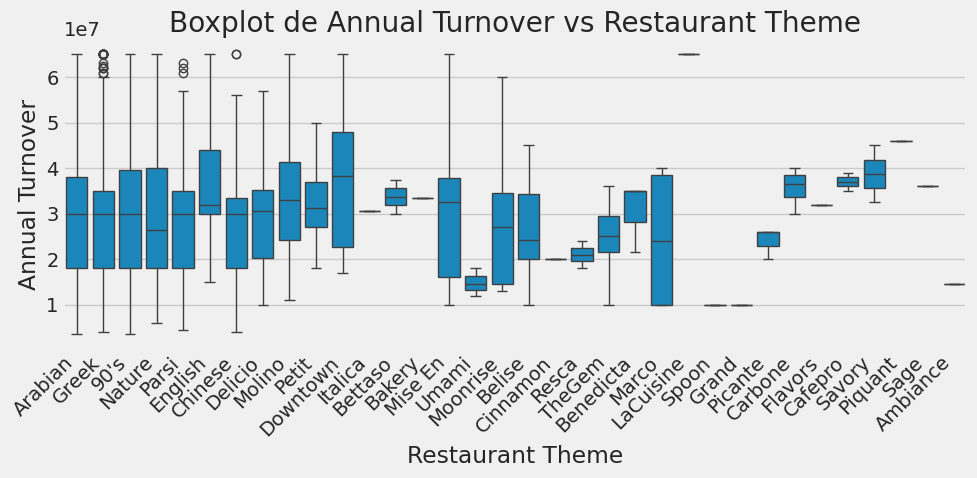

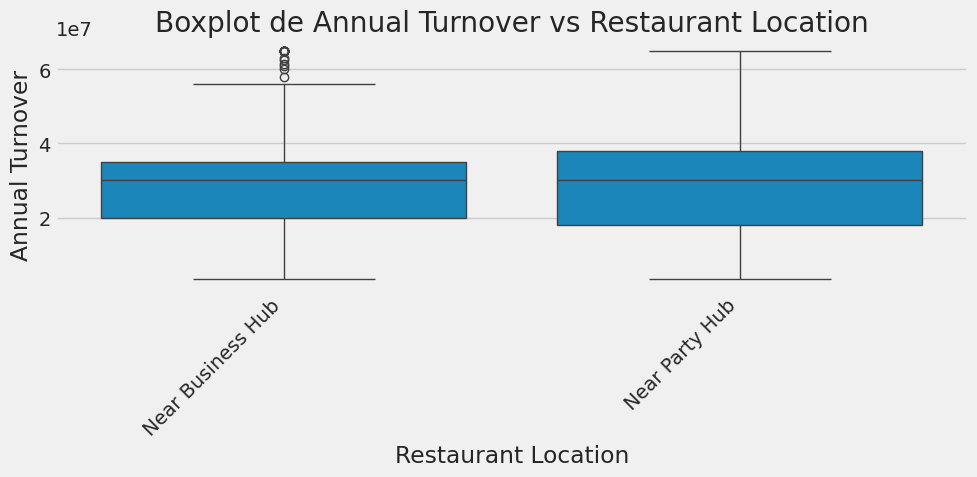

In [16]:
col_categorical = ["Endorsed By","Restaurant Type","Restaurant Theme","Annual Turnover","Restaurant Location"]

for col in col_categorical:
    if col != 'Annual Turnover':
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[col], y=df['Annual Turnover'])
        plt.title(f"Boxplot de Annual Turnover vs {col}")
        plt.xlabel(col)
        plt.ylabel('Annual Turnover')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


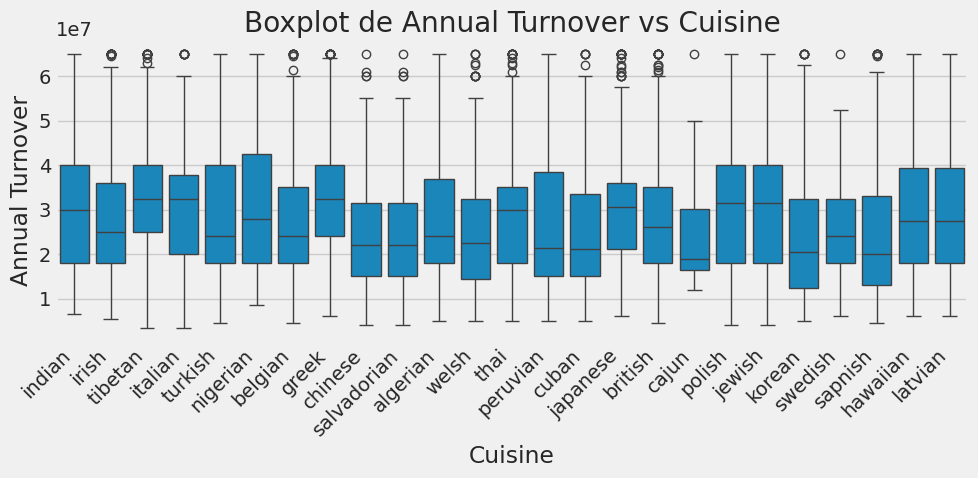

In [17]:
df_expanded = df.assign(Cuisine=df['Cuisine'].str.split(',')).explode('Cuisine').reset_index(drop=True)
df_expanded = df_expanded[["Annual Turnover","Cuisine"]]

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_expanded['Cuisine'], y=df_expanded['Annual Turnover'])
plt.title(f"Boxplot de Annual Turnover vs Cuisine")
plt.xlabel('Cuisine')
plt.ylabel('Annual Turnover')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
df['City'].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', '-1',
       'mohali', 'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida',
       'delhi', 'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi',
       'Mangalore', 'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Maharajganj', 'Thiruvananthapuram', 'Punchkula',
       'Bhubaneshwar', 'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'kolkata', 'mumbai', 'Gandhi Nagar', 'Una',
       'Daman and Diu', 'chennai', 'GURGOAN', 'vsakhapttnam', 'pune',
       'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Mysore ',
       'Kanpur ', 'jaipur', 'Gurgaon ', 'bangalore', 'CHENNAI',
       'Vijayawada', 'Kochi', 'Beawar', 'Alwar', 'NOIDA', 'Greater noida',
       'Siliguri ', 'raipur', 'gurgaon',

Restaurant Counts by Country:
Country
India        3084
Unknown       403
UAE             4
Australia       1
UK              1
Name: count, dtype: int64




/tmp/ipykernel_25949/3540933629.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='plasma')


Text(0.5, 0, 'Number of Restaurants')

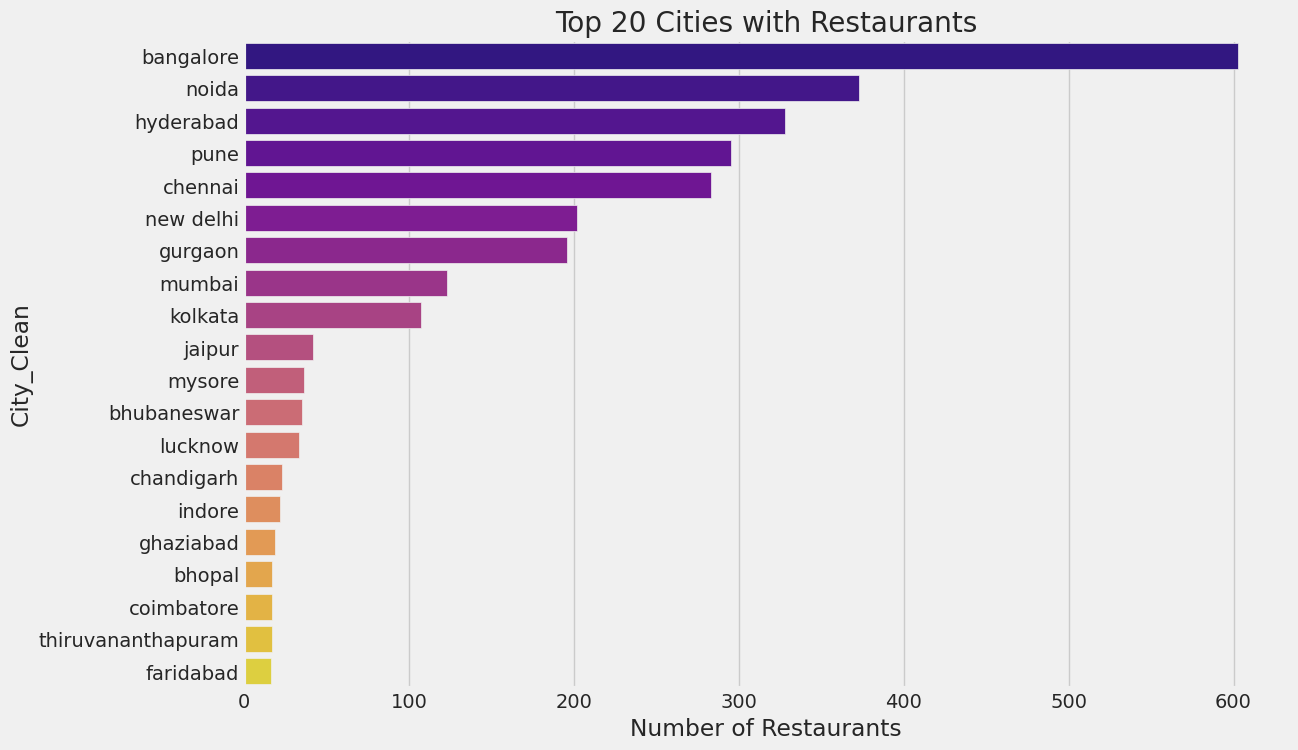

In [19]:
# Clean the 'City' column
# Convert to string, strip whitespace, and convert to lowercase
df['City_Clean'] = df['City'].astype(str).str.strip().str.lower()

# Define a comprehensive mapping for city name variations
city_mapping = {
    # Bangalore
    'banglore': 'bangalore', 'bengaluru': 'bangalore', 'banagalore': 'bangalore',
    'bangalore ': 'bangalore', 'bengaluru': 'bangalore', 'chennai, bangalore': 'bangalore',

    # Delhi
    'delhi': 'new delhi', 'new delhi - jaisalmer': 'new delhi', 'new delhi': 'new delhi',
    'delhi/ncr': 'new delhi', 'ncr': 'new delhi',

    # Gurgaon
    'gurgoan': 'gurgaon', 'gurga': 'gurgaon',

    # Hyderabad
    'hyderabad ': 'hyderabad', 'hderabad': 'hyderabad', 'hyderabad(bhadurpally)': 'hyderabad',
    'navi mumbai , hyderabad': 'hyderabad',

    # Noida
    'nouda': 'noida', 'greater noida': 'noida', 'greater noida': 'noida',

    # Kolkata
    'kolkata`': 'kolkata',

    # Mumbai
    'mumbai ': 'mumbai', 'navi mumbai': 'mumbai', 'chennai & mumbai': 'mumbai',

    # Pune
    'pune ': 'pune',

    # Thiruvananthapuram
    'trivandrum': 'thiruvananthapuram', 'technopark, trivandrum': 'thiruvananthapuram',

    # Visakhapatnam
    'vizag': 'visakhapatnam', 'vsakhapttnam': 'visakhapatnam',

    # Kochi
    'kochi/cochin': 'kochi', 'kochi/cochin, chennai and coimbatore': 'kochi',

    # Other Indian Cities
    'gaziabaad': 'ghaziabad', 'gajiabaad': 'ghaziabad', 'indirapuram, ghaziabad': 'ghaziabad',
    'mysore ': 'mysore',
    'lucknow ': 'lucknow',
    'ahmedabad ': 'ahmedabad',
    'kanpur ': 'kanpur',
    'bhubaneshwar': 'bhubaneswar', 'bhubneshwar': 'bhubaneswar',
    'jaipur ': 'jaipur',
    'thane': 'thane',
    'gandhi nagar': 'gandhinagar',
    'baroda': 'vadodara',
    'nasikcity': 'nashik',
    'pondy': 'pondicherry',
    'punchkula': 'panchkula',
    'muzzafarpur': 'muzaffarpur',
    'keral': 'kerala', # State
    
    # Locations outside India
    'london': 'london',
    'dubai': 'dubai',
    'ras al khaimah': 'ras al khaimah',
    'australia': 'australia',

    # To be handled as unknown/other
    '-1': 'unknown',
    'india': 'unknown', # Too broad
    'orissa': 'unknown', # State
    'bihar': 'unknown', # State
    'rajasthan': 'unknown', # State
    'sadulpur,rajgarh,distt-churu,rajasthan': 'unknown',
    'am': 'unknown',
    'kudankulam ,tarapur': 'unknown'
}


# Apply the mapping
df['City_Clean'] = df['City_Clean'].replace(city_mapping)

# Function to determine the country from the city name
def get_country(city_name):
    if city_name in ['london']:
        return 'UK'
    if city_name in ['dubai', 'ras al khaimah']:
        return 'UAE'
    if city_name in ['australia']:
        return 'Australia'
    if city_name in ['unknown']:
        return 'Unknown'
    # Assume the rest are in India
    return 'India'

# Create the 'Country' column
df['Country'] = df['City_Clean'].apply(get_country)

# Display the count of restaurants per country
print("Restaurant Counts by Country:")
print(df['Country'].value_counts())
print("\n" + "="*40 + "\n")


# Visualize the top 20 cities
plt.figure(figsize=(12, 8))
top_cities = df[df['City_Clean'] != 'unknown']['City_Clean'].value_counts().nlargest(20)
sns.barplot(x=top_cities.values, y=top_cities.index, palette='plasma')
plt.title('Top 20 Cities with Restaurants')
plt.xlabel('Number of Restaurants')

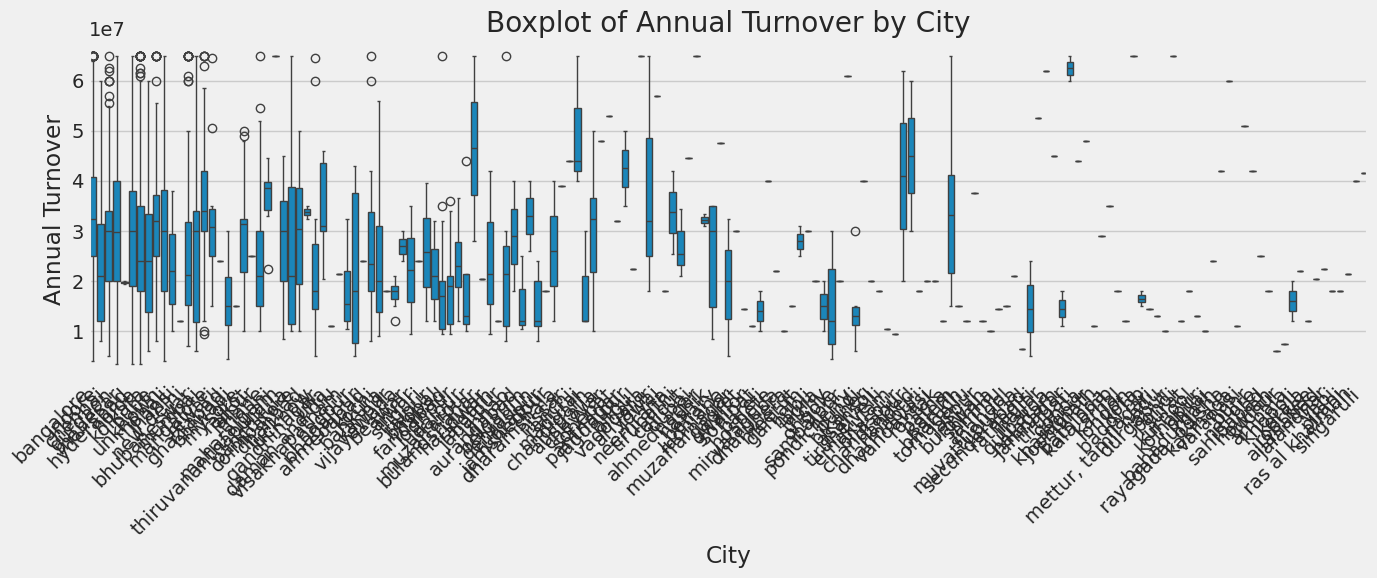

In [20]:
plt.figure(figsize=(14, 6))
sns.boxplot(x=df['City_Clean'], y=df['Annual Turnover'])
plt.title('Boxplot of Annual Turnover by City')
plt.xlabel('City')
plt.ylabel('Annual Turnover')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
df[df['Country']=='India']["City_Clean"].unique()

array(['bangalore', 'indore', 'chennai', 'gurgaon', 'manesar',
       'hyderabad', 'noida', 'kolkata', 'pune', 'mohali', 'jhansi',
       'new delhi', 'bhubaneswar', 'mumbai', 'mangalore', 'rewari',
       'ghaziabad', 'bhiwadi', 'mysore', 'rajkot', 'jaipur', 'thane',
       'maharajganj', 'thiruvananthapuram', 'panchkula', 'coimbatore',
       'dhanbad', 'lucknow', 'gandhinagar', 'una', 'daman and diu',
       'visakhapatnam', 'nagpur', 'bhagalpur', 'ahmedabad', 'kochi',
       'bankura', 'kanpur', 'vijayawada', 'beawar', 'alwar', 'siliguri',
       'raipur', 'bhopal', 'faridabad', 'jodhpur', 'udaipur',
       'muzaffarpur', 'bulandshahar', 'haridwar', 'raigarh', 'jabalpur',
       'unnao', 'aurangabad', 'belgaum', 'dehradun', 'rudrapur',
       'jamshedpur', 'dharamshala', 'hissar', 'ranchi', 'madurai',
       'chandigarh', 'cheyyar', 'sonepat', 'pantnagar', 'jagdalpur',
       'angul', 'vadodara', 'ariyalur', 'jowai', 'neemrana', 'tirupathi',
       'calicut', 'ahmednagar', 'nashik'

Tier 1: Major metropolitan cities with high population density and economic activity.
Tier 2: Other large cities and regional hubs.
Tier 3: Smaller cities and developing towns.

In [22]:
def get_city_tier(city):
    tier_1_cities = [
        'bangalore', 'chennai', 'new delhi', 'gurgaon', 'hyderabad', 
        'kolkata', 'mumbai', 'pune', 'ahmedabad', 'noida'
    ]
    
    tier_2_cities = [
        'agra', 'ajmer', 'aligarh', 'amravati', 'amritsar', 'asansol', 'aurangabad', 
        'bareilly', 'belgaum', 'bhavnagar', 'bhiwandi', 'bhopal', 'bhubaneswar', 
        'bikaner', 'bilaspur', 'bokaro steel city', 'chandigarh', 'coimbatore', 
        'cuttack', 'dehradun', 'dhanbad', 'bhilai', 'durgapur', 'erode', 'faridabad', 
        'firozabad', 'ghaziabad', 'gorakhpur', 'gulbarga', 'guntur', 'gwalior', 
        'guwahati', 'hubli', 'indore', 'jabalpur', 'jaipur', 'jalandhar', 'jammu', 
        'jamnagar', 'jamshedpur', 'jhansi', 'jodhpur', 'kakinada', 'kannur', 'kanpur', 
        'kochi', 'kolhapur', 'kollam', 'kota', 'kozhikode', 'kurnool', 'ludhiana', 
        'lucknow', 'madurai', 'malappuram', 'mathura', 'goa', 'mangalore', 'meerut', 
        'moradabad', 'mysore', 'nagpur', 'nashik', 'nellore', 'patna', 'pondicherry', 
        'allahabad', 'raipur', 'rajkot', 'ranchi', 'rourkela', 'ratlam', 'salem', 
        'sangli', 'shimla', 'siliguri', 'solapur', 'srinagar', 'surat', 'thanjavur', 
        'thiruvananthapuram', 'thrissur', 'trichy', 'tirunelveli', 'tiruppur', 'ujjain', 
        'vadodara', 'varanasi', 'vijayawada', 'visakhapatnam', 'vellore', 'warangal',
        'secunderabad'
    ]
    
    if city in tier_1_cities:
        return 'Tier 1'
    elif city in tier_2_cities:
        return 'Tier 2'
    elif city == 'unknown':
        return 'Unknown'
    else:
        return 'Tier 3'

# Apply the function only to Indian cities
df['City_Tier'] = 'Other' # Default value for non-Indian cities
india_mask = df['Country'] == 'India'
df.loc[india_mask, 'City_Tier'] = df.loc[india_mask, 'City_Clean'].apply(get_city_tier)

print("City Tier Distribution:")
print(df['City_Tier'].value_counts())

City Tier Distribution:
City_Tier
Tier 1    2526
Tier 2     431
Other      409
Tier 3     127
Name: count, dtype: int64


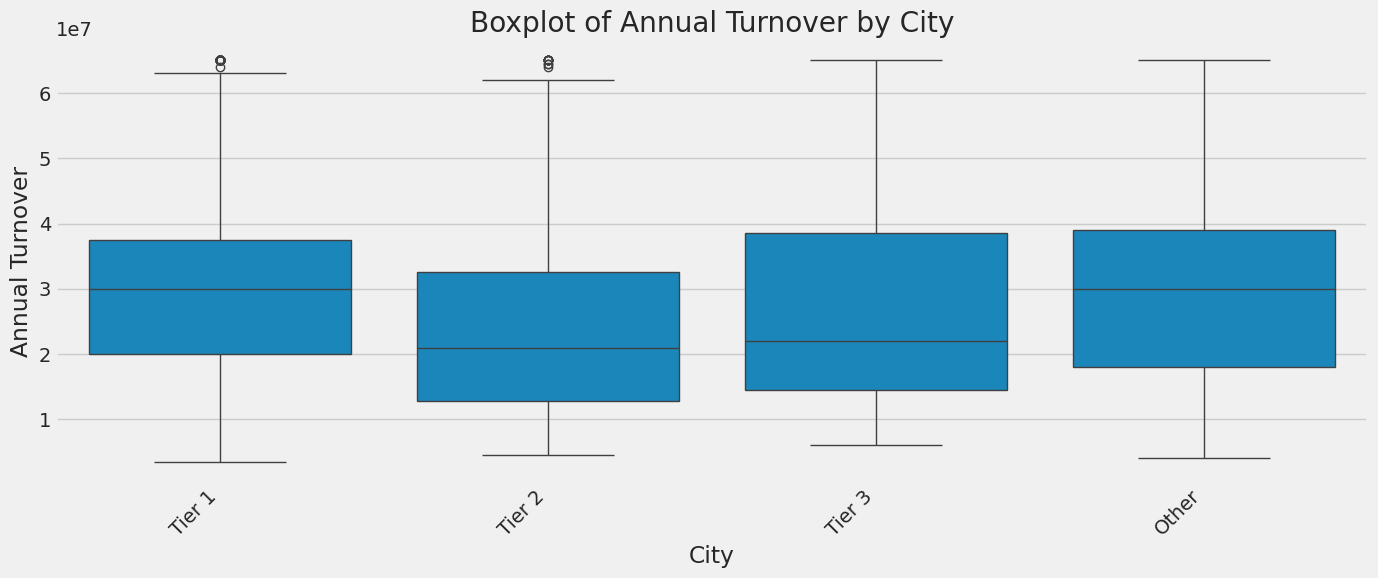

In [23]:
plt.figure(figsize=(14, 6))
sns.boxplot(x=df['City_Tier'], y=df['Annual Turnover'])
plt.title('Boxplot of Annual Turnover by City')
plt.xlabel('City')
plt.ylabel('Annual Turnover')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

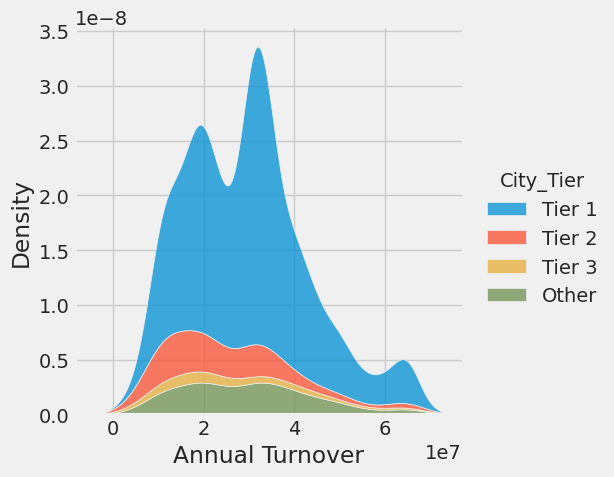

In [24]:
sns.displot(data=df, x='Annual Turnover', hue="City_Tier", multiple="stack", kind="kde")


/tmp/ipykernel_25949/719743072.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=df, x='Annual Turnover', hue=col, multiple="stack", kind="kde")
/tmp/ipykernel_25949/719743072.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=df, x='Annual Turnover', hue=col, multiple="stack", kind="kde")
/home/barenas/miniconda3/envs/ml-venv/lib/python3.11/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)
/tmp/ipykernel_25949/719743072.py:4: UserWarning: Dataset has 0 variance; skipping dens

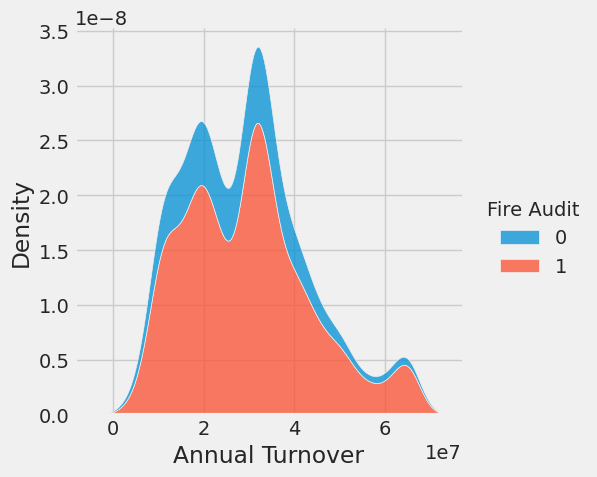

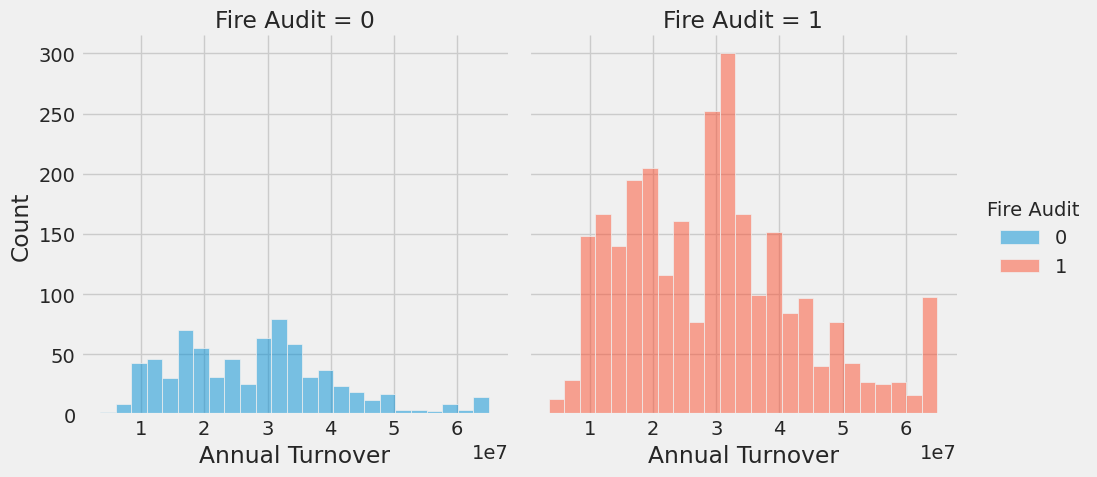

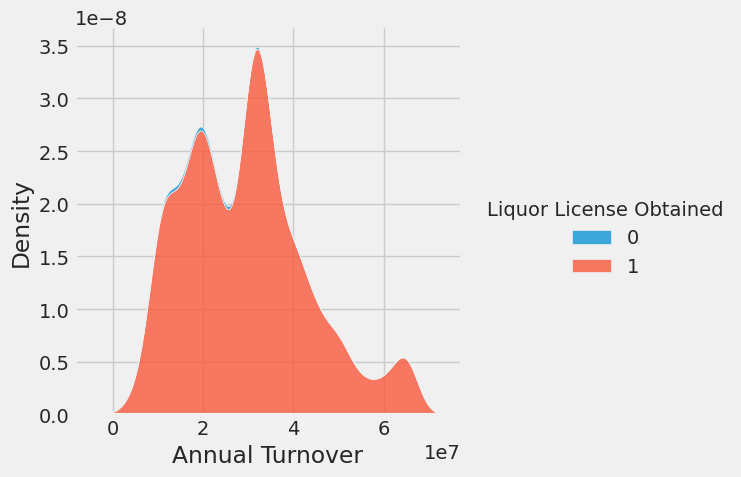

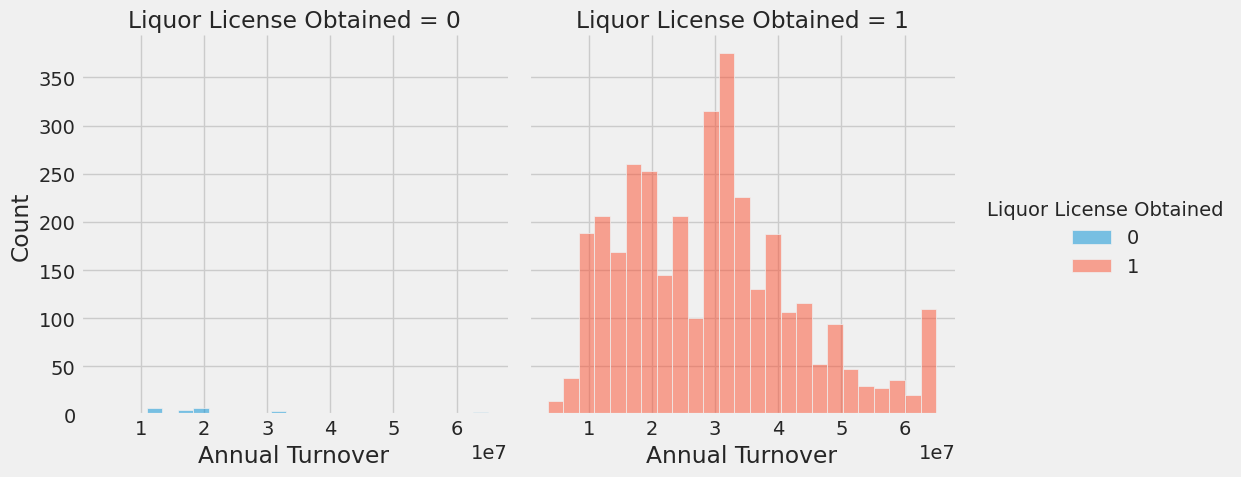

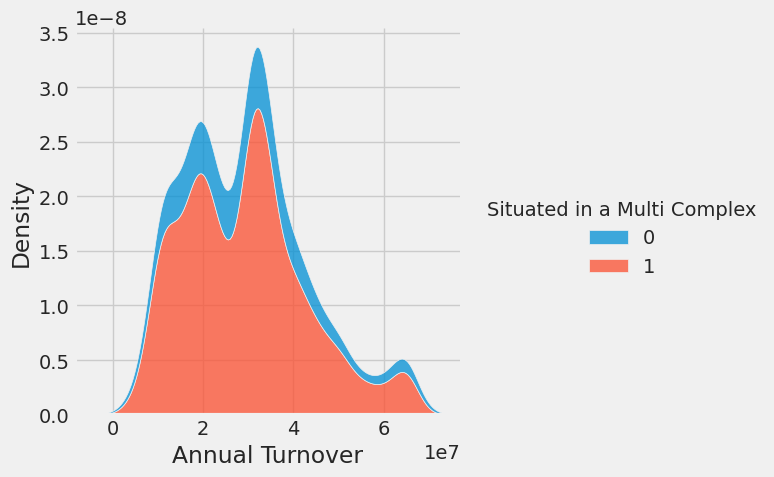

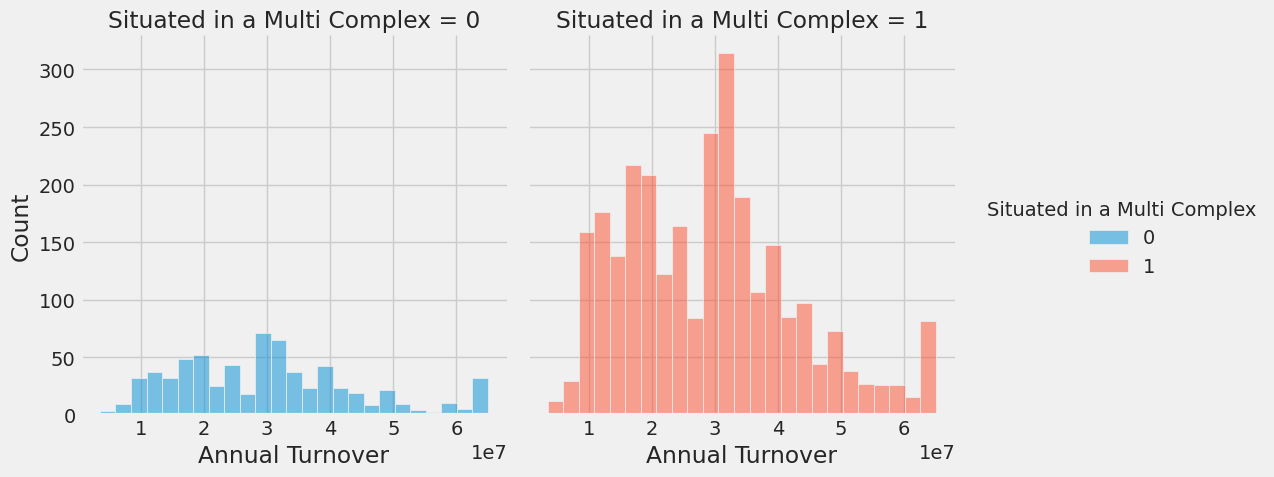

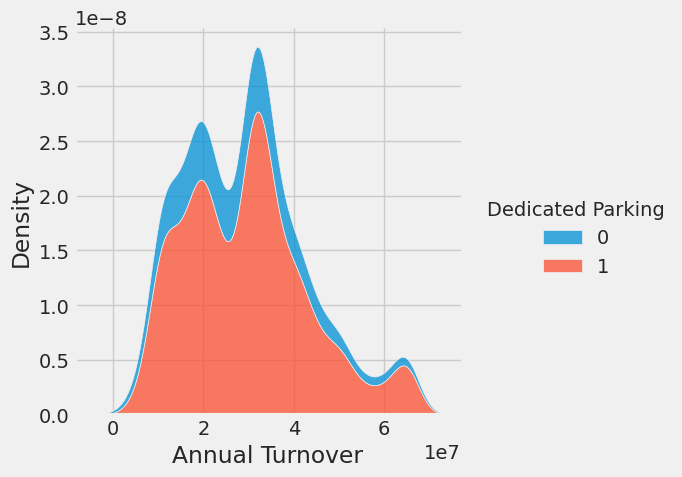

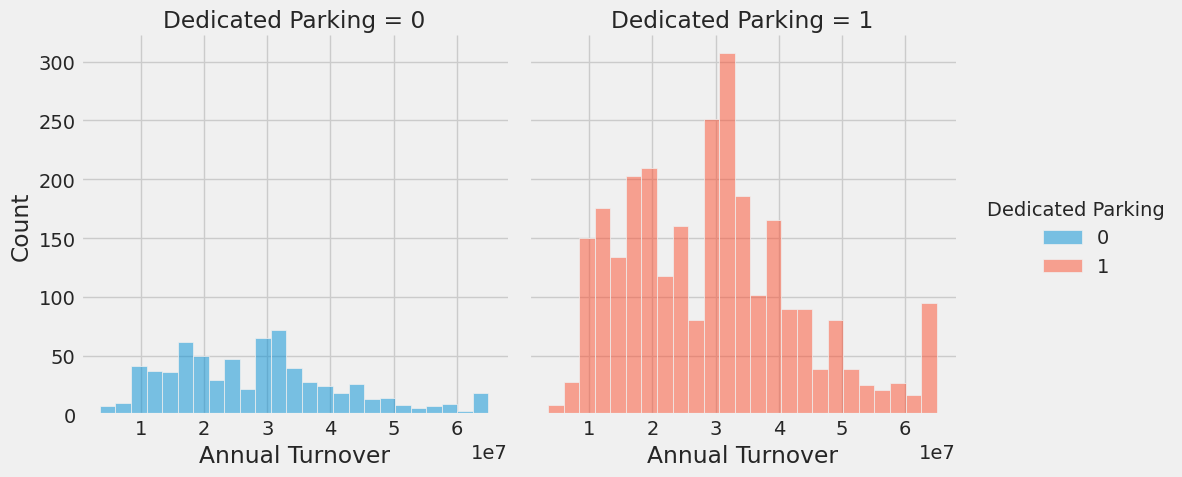

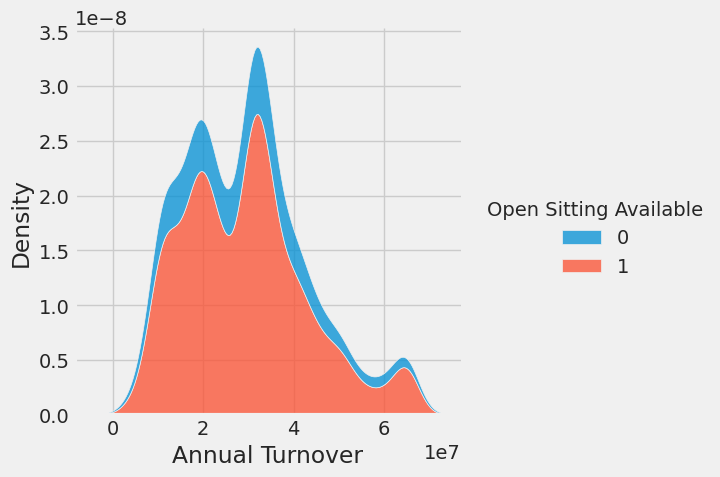

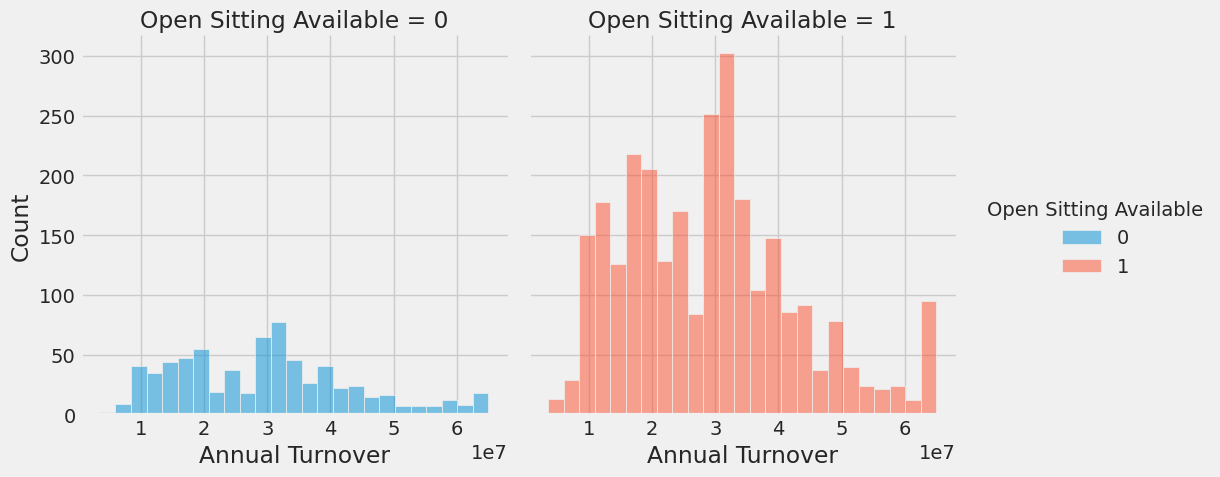

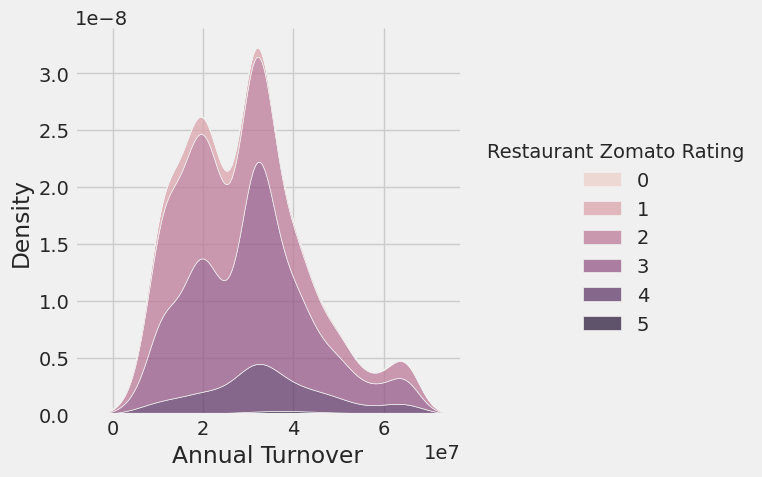

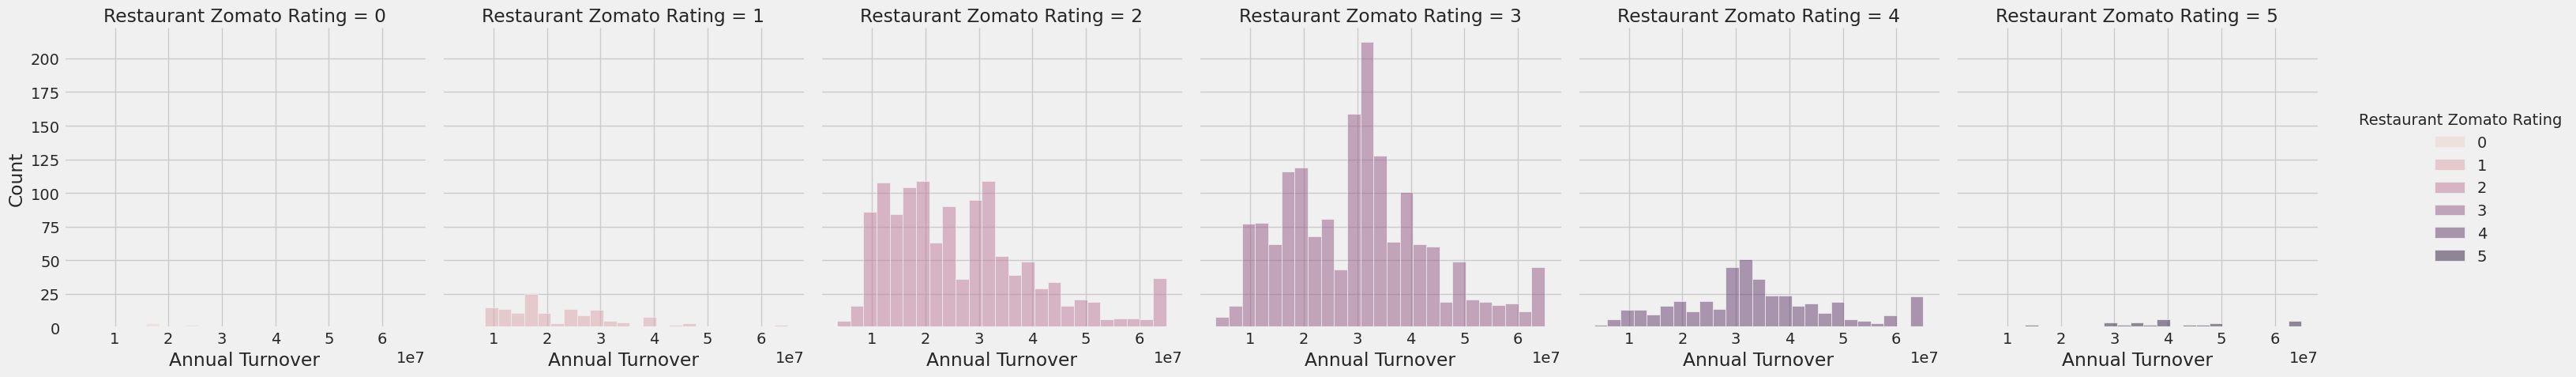

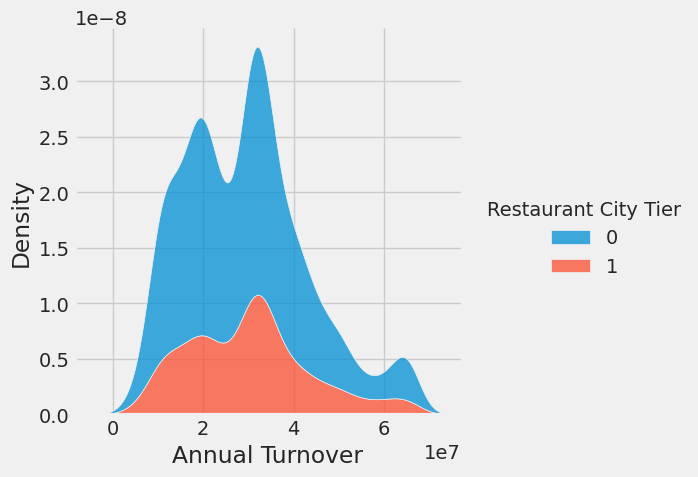

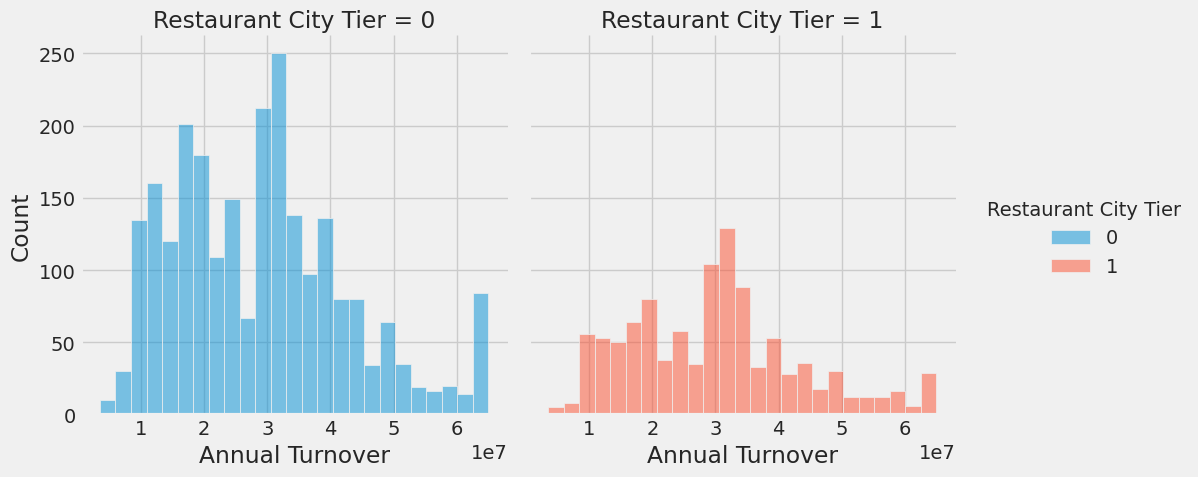

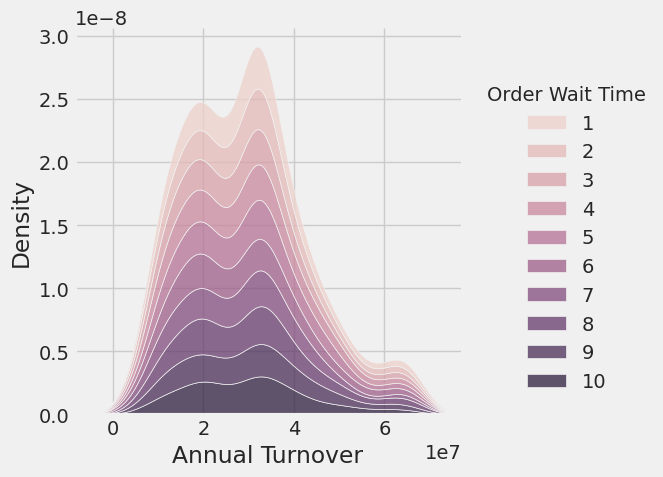

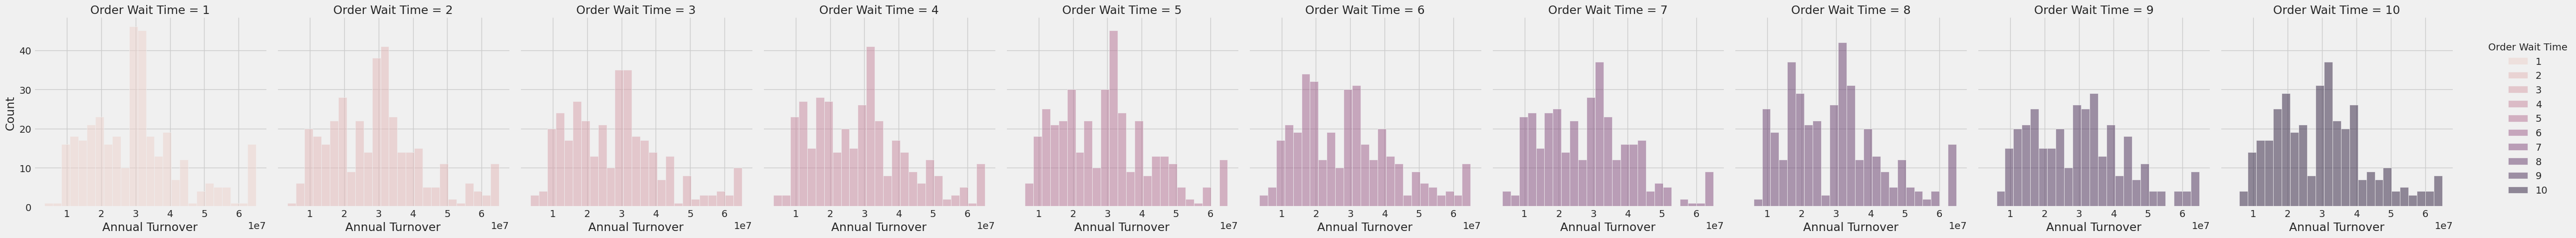

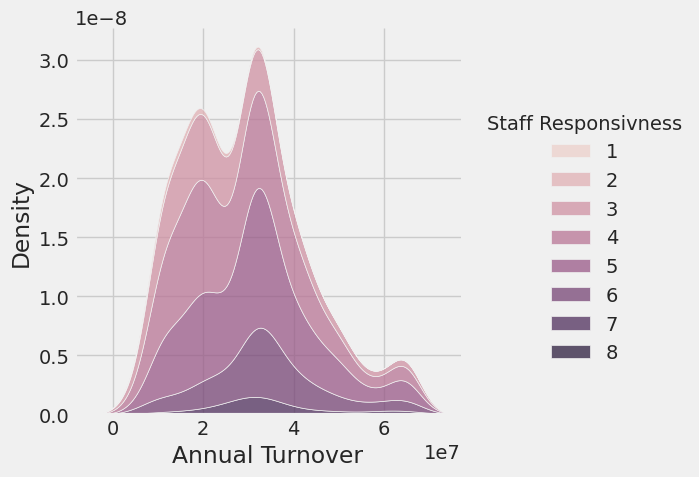

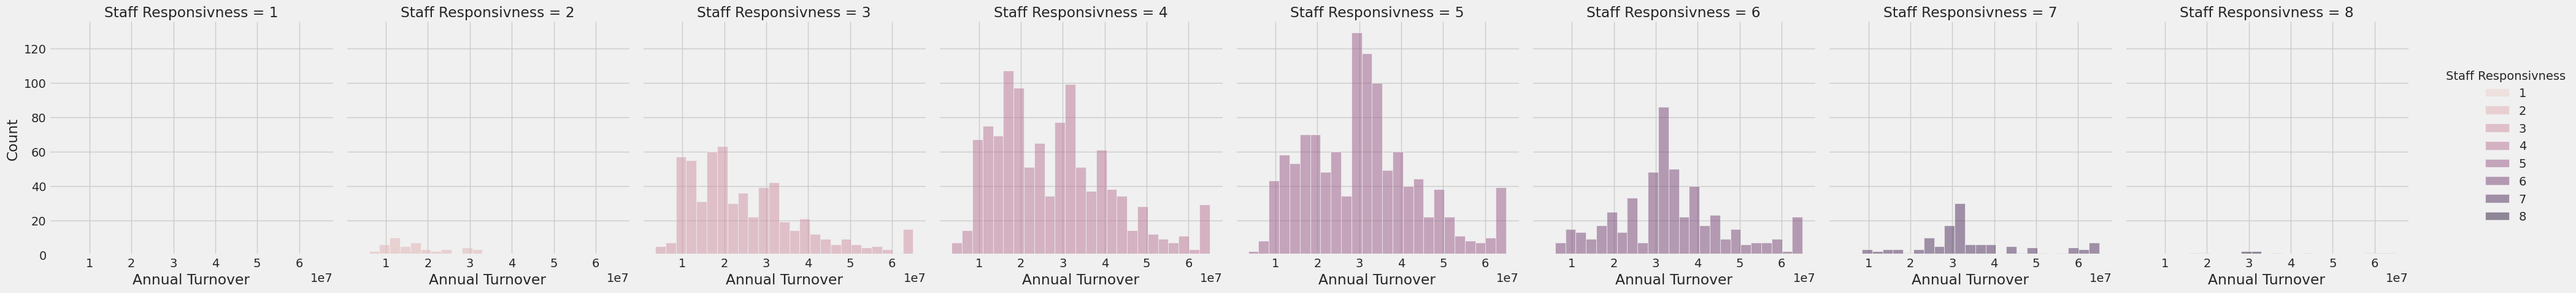

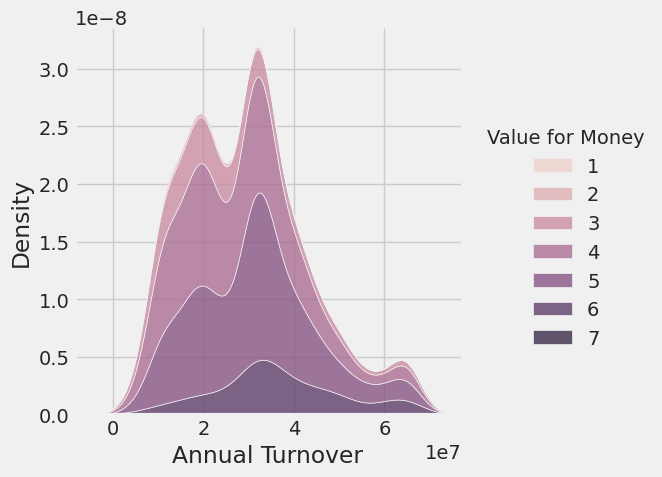

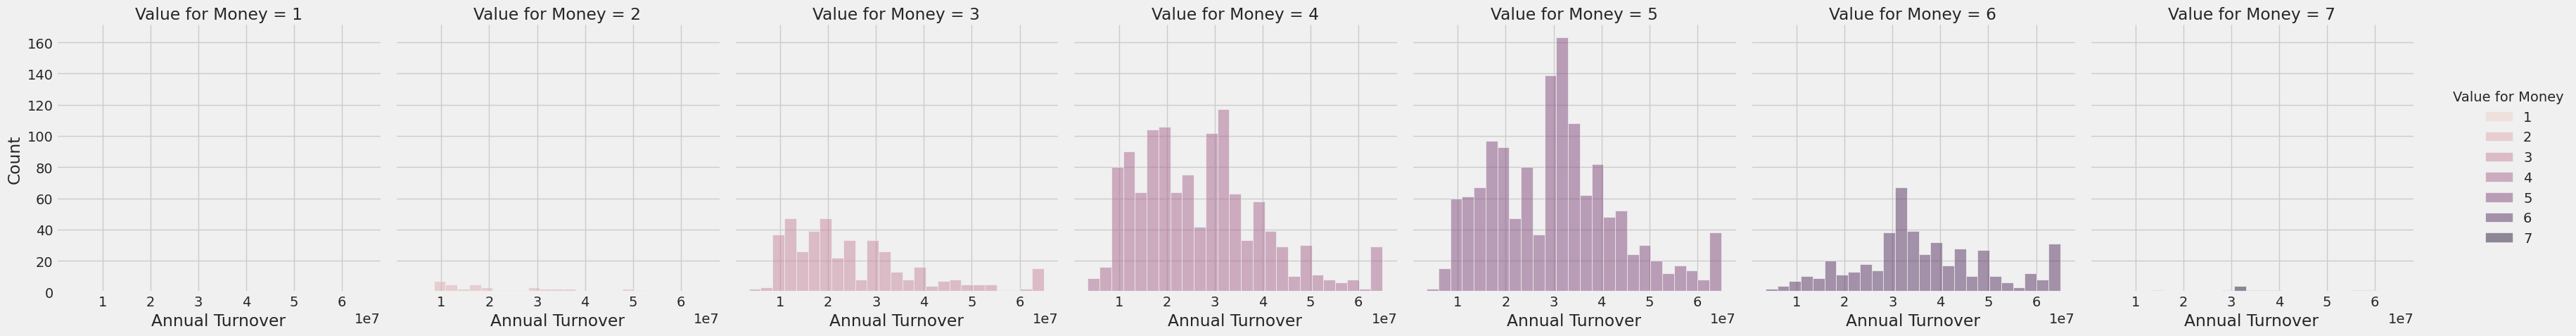

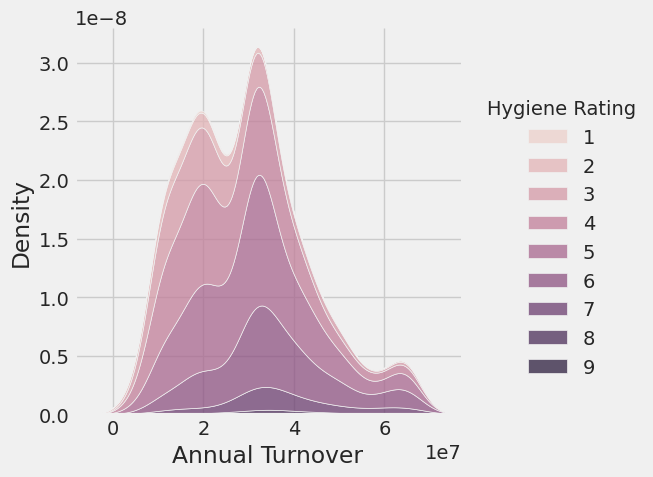

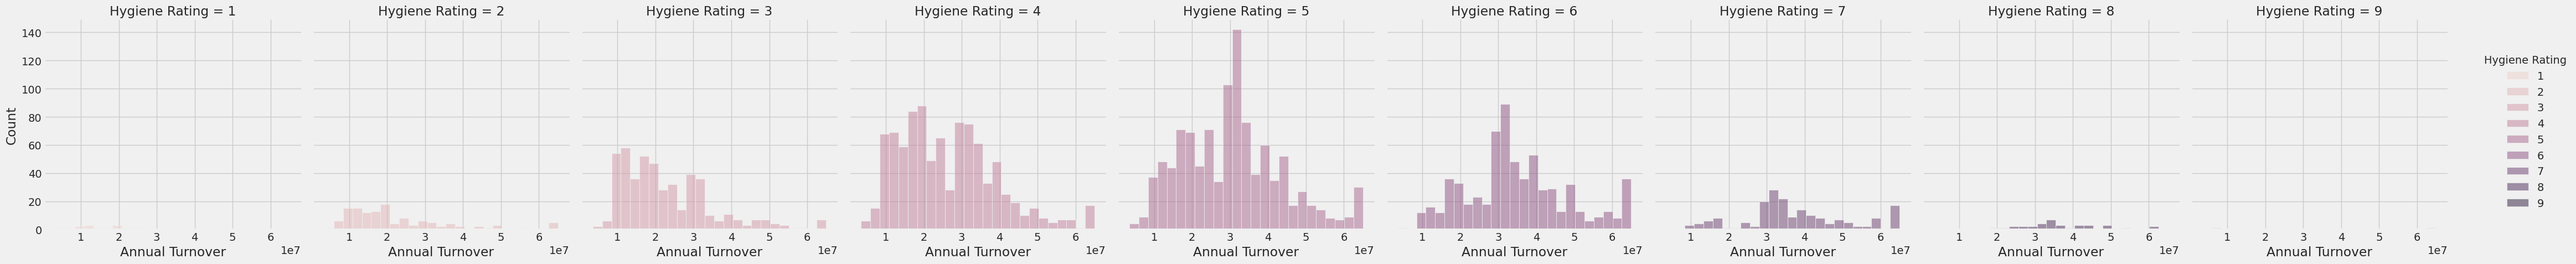

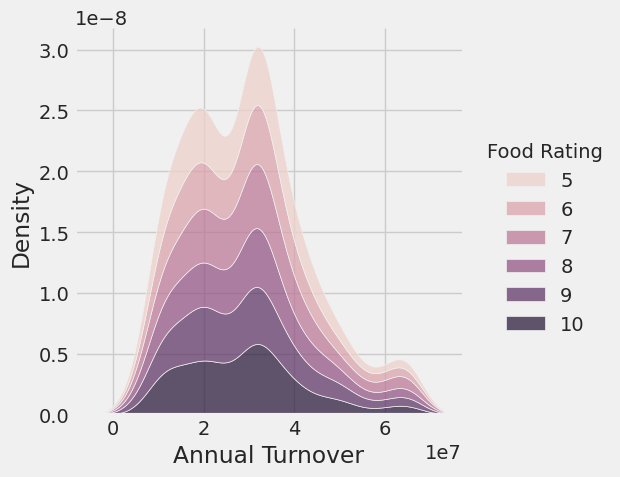

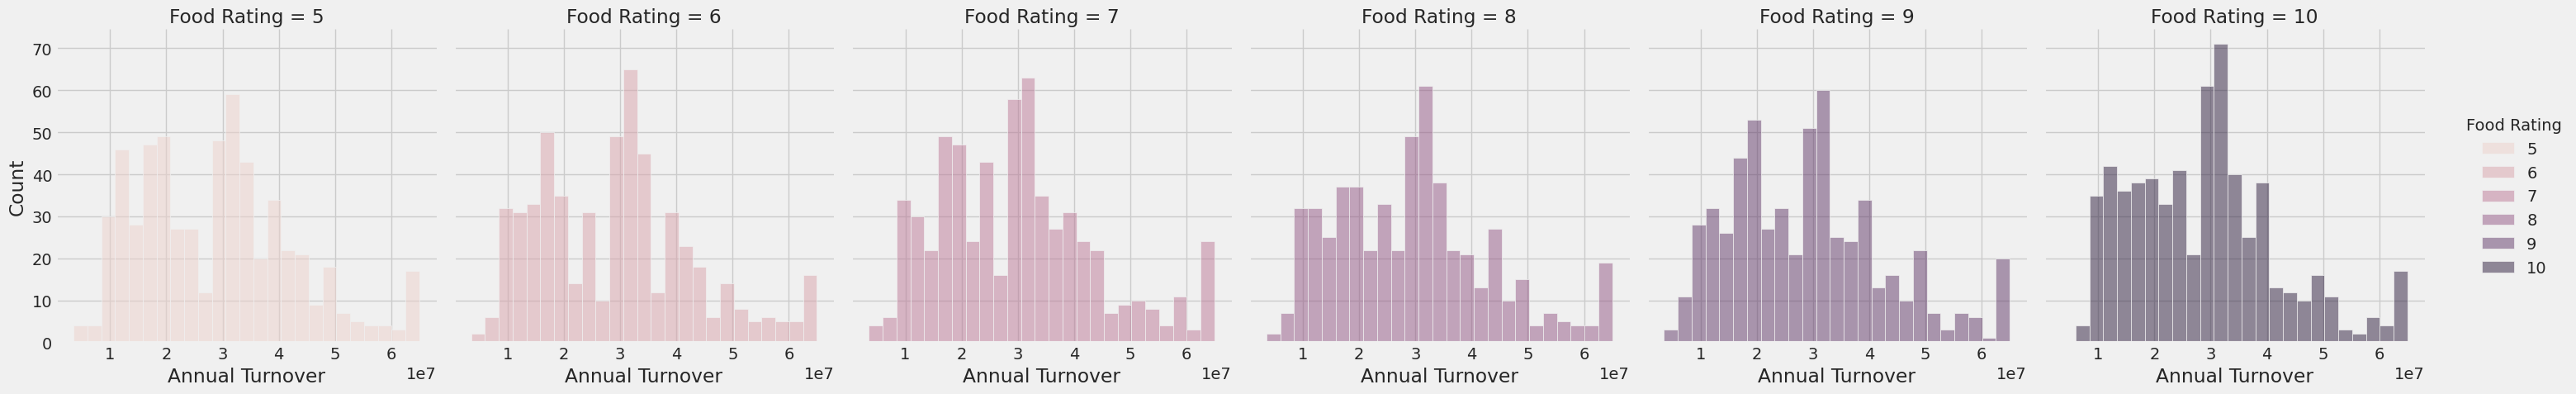

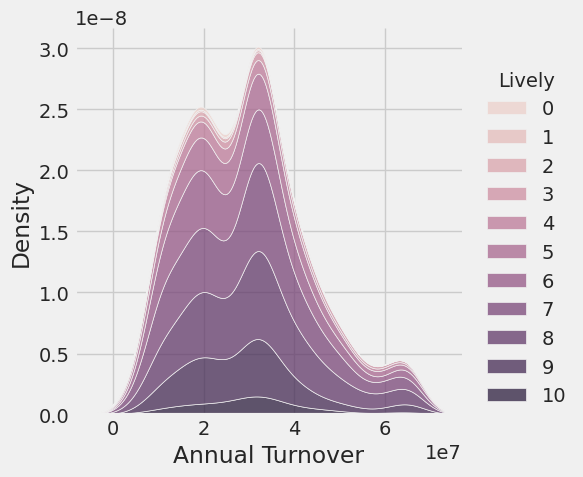

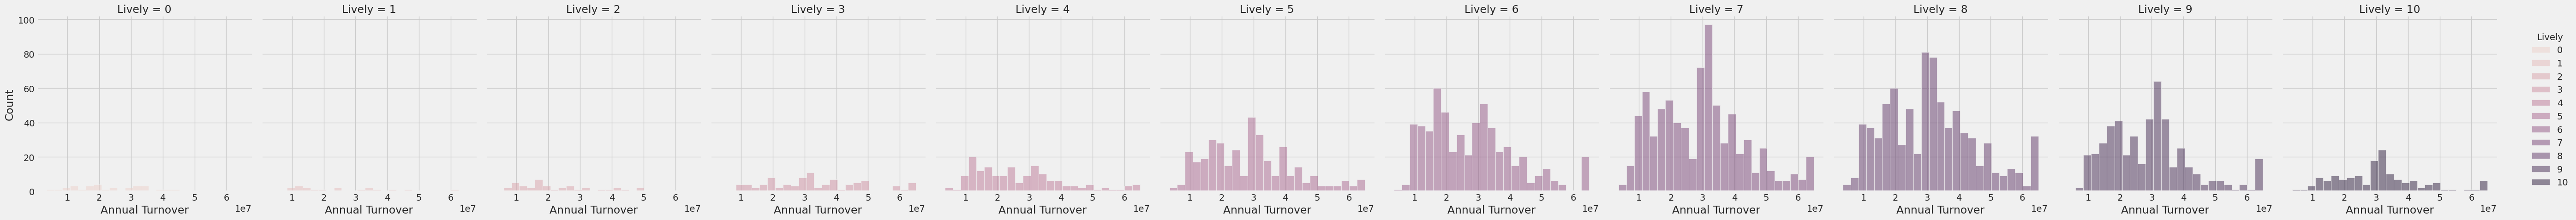

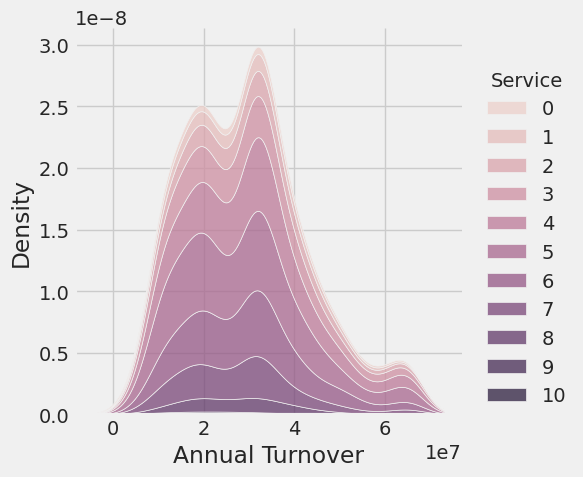

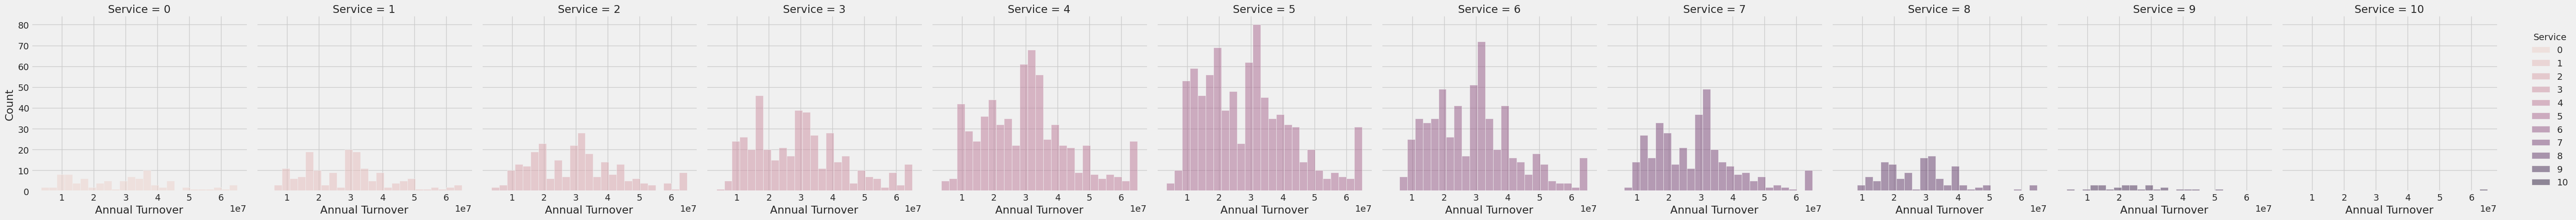

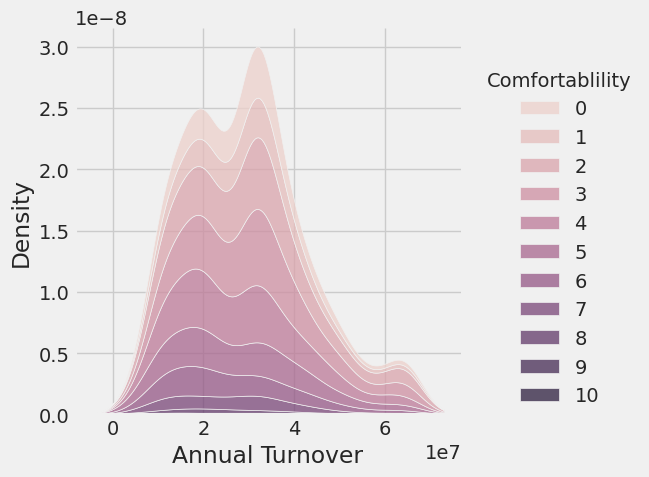

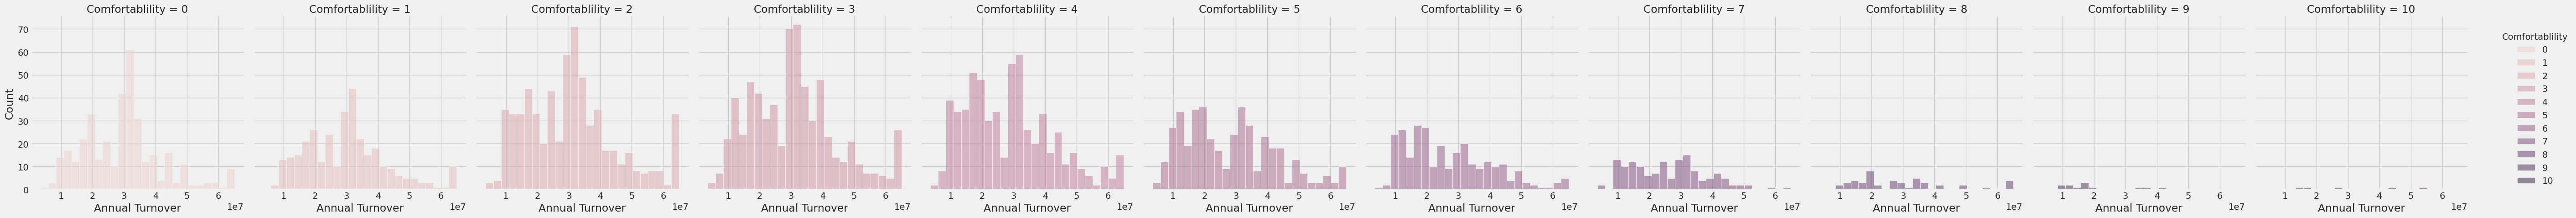

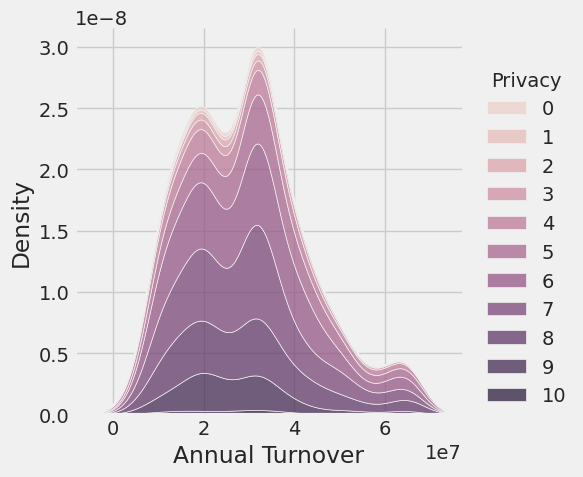

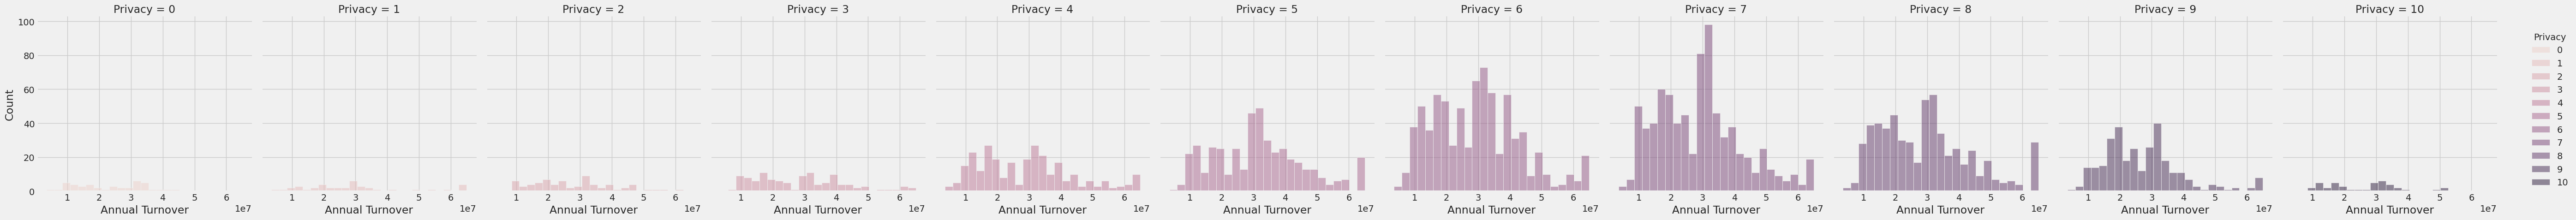

In [25]:
int_columns
for col in int_columns:
    if col != 'Annual Turnover':
        sns.displot(data=df, x='Annual Turnover', hue=col, multiple="stack", kind="kde")
        sns.displot(data=df, x='Annual Turnover', hue=col,col=col)



/tmp/ipykernel_25949/3712344697.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=df, x='Annual Turnover', hue=col, multiple="stack", kind="kde")
/tmp/ipykernel_25949/3712344697.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=df, x='Annual Turnover', hue=col, multiple="stack", kind="kde")


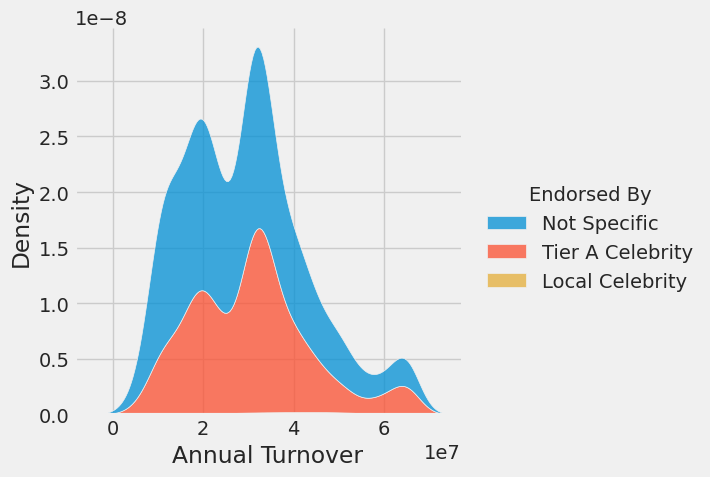

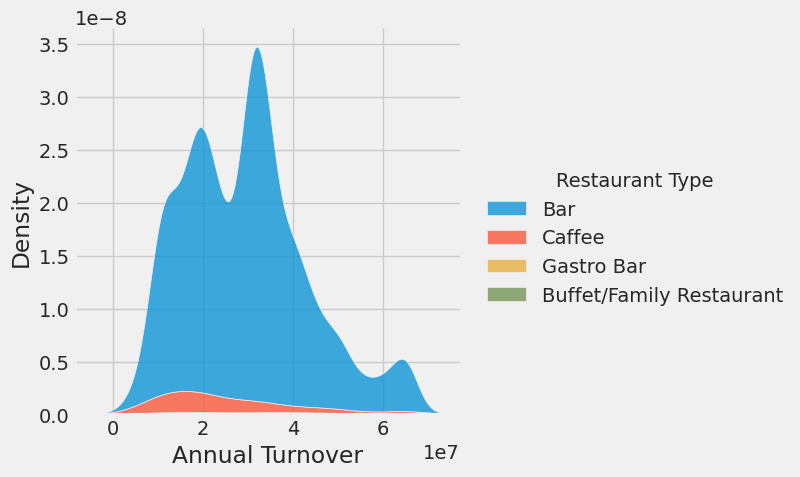

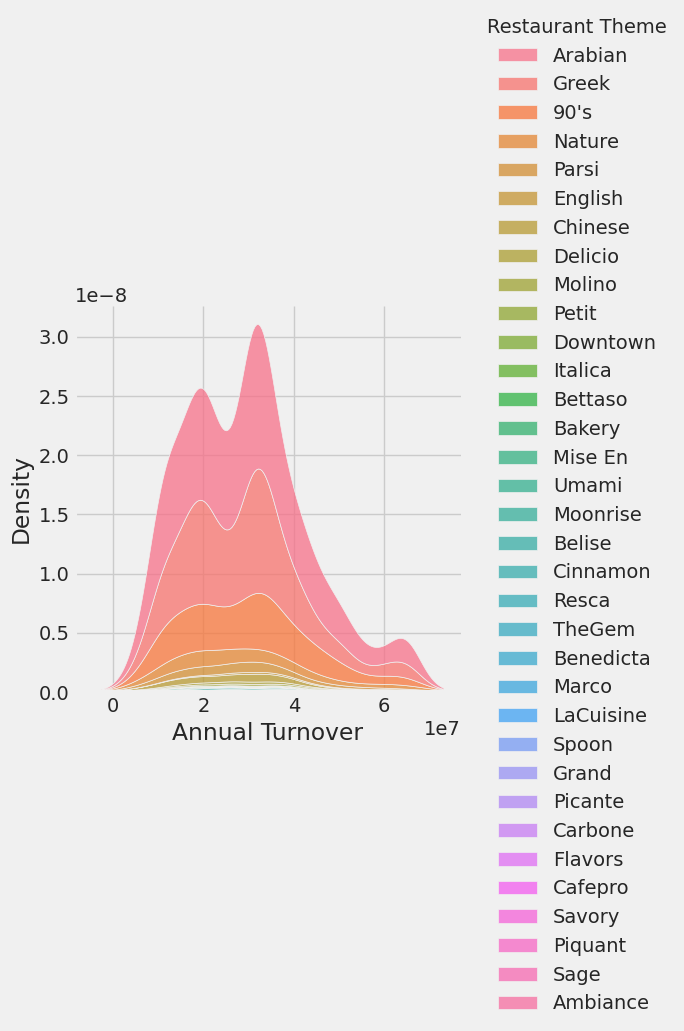

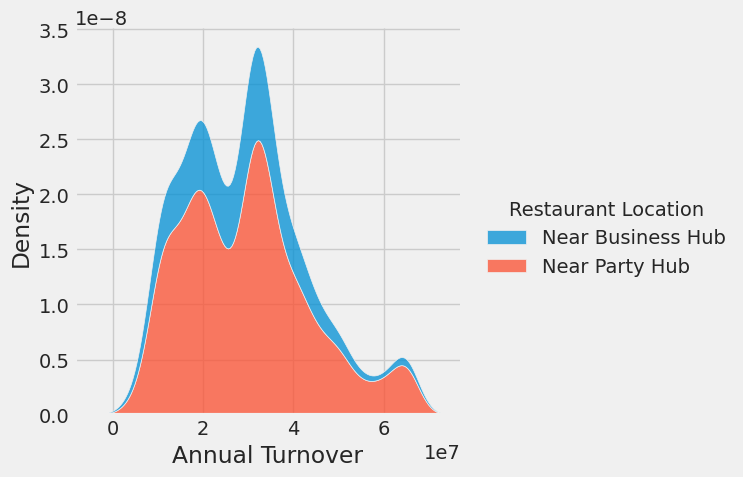

In [26]:
for col in col_categorical:
    if col != 'Annual Turnover':
        sns.displot(data=df, x='Annual Turnover', hue=col, multiple="stack", kind="kde")

In [27]:
df.to_csv('process/restaurants_dataset_cleaned.csv', index=False)